### 0、describe data

In [39]:
import pandas as pd

path_to = "/home/guoyou/ExtractSemantic/Data/"


# 设置 Pandas 显示格式，避免科学计数法
pd.set_option('display.float_format', lambda x: '%.3f' % x)

def describe_file(file_path, value_name):
    data = pd.read_csv(file_path, header=None)
    data.columns = ['Time', value_name]
    return data[value_name].describe()

# 文件路径
file_paths = {
    'Cricket.csv': path_to+'Cricket.csv',
    'FaceFour.csv': path_to+'FaceFour.csv',
    'Lightning.csv': path_to+'Lightning.csv',
    'MoteStrain.csv': path_to+'MoteStrain.csv',
    'Pressure.csv': path_to+'Pressure.csv',
    'Wafer.csv': path_to+'Wafer.csv',
    'Ecg.csv': path_to+'Ecg.csv',
    'WindDirection.csv': path_to+'WindDirection.csv',
    'WindSpeed.csv': path_to+'WindSpeed.csv'
}

# 处理每个文件
descriptions = []
file_names = []
for file_name, file_path in file_paths.items():
    file_names.append(file_name)
    descriptions.append(describe_file(file_path, file_name.split('.')[0]))

# 合并所有描述到一个 DataFrame
combined_stats = pd.concat(descriptions, axis=1)
combined_stats.columns = file_names

# 显示组合后的统计数据
print(combined_stats)


       Cricket.csv  FaceFour.csv  Lightning.csv  MoteStrain.csv  Pressure.csv  \
count   702000.000     39200.000     122694.000      106848.000  12098677.000   
mean         0.000         0.000          0.000           0.000        99.003   
std          0.998         0.999          0.999           0.994         3.230   
min        -10.199        -4.688         -1.781          -8.638        90.994   
25%         -0.610        -0.504         -0.477          -0.736        95.431   
50%         -0.041        -0.098         -0.236          -0.003       101.125   
75%          0.599         0.416          0.102           0.748       101.566   
max         12.707         5.908         23.131           8.544       104.073   

        Wafer.csv    Ecg.csv  WindDirection.csv  WindSpeed.csv  
count 1088928.000 699720.000        1169510.000    4119081.000  
mean       -0.000      0.006            187.330          1.895  
std         0.997      0.993            107.160          1.905  
min       

In [40]:
import pandas as pd
import os

path_to = "/home/guoyou/ExtractSemantic/Data/Test/"

# 文件路径
file_paths = {
    'Watch_gyroscope_X.csv': path_to+'Watch_gyroscope_X.csv',
    'Watch_accelerometer_X.csv': path_to+'Watch_accelerometer_X.csv',
    'nanopore.csv': path_to+'nanopore.csv',
    'active_power.csv': path_to+'active_power.csv'
}

for file_name, file_path in file_paths.items():
    print(file_name)
    df = pd.read_csv(file_path)
    summary = df.describe()
    print(summary)
    print(os.path.getsize(file_path)/1024/1024)
    print()


Watch_gyroscope_X.csv
                0
count 3205431.000
mean        0.015
std         1.039
min       -24.074
25%        -0.316
50%         0.003
75%         0.344
max        31.803
34.64185905456543

Watch_accelerometer_X.csv
                0
count 3540962.000
mean       -0.482
std         8.126
min       -19.670
25%        -8.056
50%         0.599
75%         7.123
max        19.613
33.67848491668701

nanopore.csv
                0
count 1167877.000
mean        0.204
std         0.944
min        -8.787
25%        -0.543
50%         0.000
75%         0.899
max         9.031
12.129949569702148

active_power.csv
                0
count 2049280.000
mean        1.092
std         1.057
min         0.076
25%         0.308
50%         0.602
75%         1.528
max        11.122
11.296475410461426



In [3]:
import csv

path_to = "/home/guoyou/ExtractSemantic/Data/"

max_decimal_places = 0  # 用于存储最大小数位数的变量
row_number = 0  # 用于存储包含最大小数位数的浮点数的行数
max_decimal_value = None  # 用于存储最大小数位数的浮点数的值

# 打开 CSV 文件
with open(path_to+'Ecg.csv', newline='') as csvfile:
    # 创建 CSV 读取器
    reader = csv.reader(csvfile)
    
    # 遍历 CSV 文件的每一行
    for row in reader:
        row_number += 1  # 增加行号
        
        # 遍历当前行的每个元素
        for item in row:
            # 尝试将元素转换为浮点数
            try:
                # 转换为浮点数
                float_value = float(item)
                
                # 将浮点数转换为字符串，并找到小数点后的位数
                decimal_places = len(str(float_value).split('.')[1]) if '.' in str(float_value) else 0
                
                # 如果找到更多位的浮点数，则更新最大小数位数、行号和值
                if decimal_places > max_decimal_places:
                    max_decimal_places = decimal_places
                    row_number_with_max_decimal = row_number
                    max_decimal_value = float_value
                
            except ValueError:
                # 如果无法转换为浮点数，则跳过
                pass

print("位于第", row_number_with_max_decimal, "行的最大小数位数为:", max_decimal_places)
print("对应的浮点数值为:", max_decimal_value)


位于第 1906 行的最大小数位数为: 11
对应的浮点数值为: -0.00047767913


### 1、bar Plot for lossless

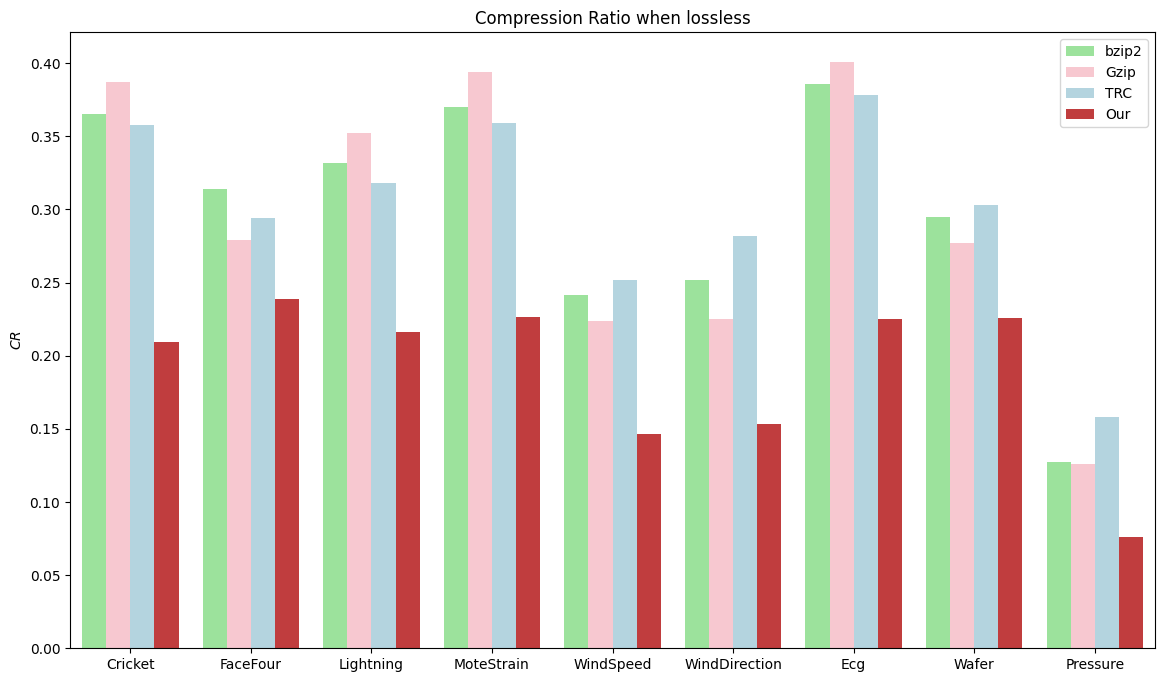

/home/guoyou/ExtractSemantic/figure/crLossless.pdf


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the line plot
datasets = ['Cricket', 'FaceFour', 'Lightning', 'MoteStrain', 'WindSpeed', 'WindDirection', 'Ecg', 'Wafer', 'Pressure']
bzip2 = [0.3651, 0.3142, 0.3314, 0.3698, 0.2414, 0.2515,  0.386, 0.2951, 0.1276]
Gzip = [0.387, 0.279, 0.352, 0.394, 0.224, 0.225, 0.401, 0.277, 0.126]
TRC = [0.358, 0.294, 0.318, 0.359, 0.252, 0.282,  0.378, 0.303, 0.158]
Our = [0.20955, 0.23876, 0.21648, 0.22622, 0.14673, 0.15336,  0.225, 0.22546, 0.07638]

# Constructing a DataFrame
df = pd.DataFrame({
    'Dataset': datasets,
    'bzip2': bzip2,
    'Gzip': Gzip,
    'TRC': TRC,
    'Our': Our
})


# Convert data to a long-form DataFrame
df_long = pd.melt(df, id_vars='Dataset', var_name='Method', value_name='Compression Ratio')

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(14, 8))

# Set color palette and hatches
color_palette = sns.color_palette('tab10')
palette = ['lightgreen', 'pink', 'lightblue', color_palette[3]]
hatches = ['\\', '////', '//////', '']



# Plot the bars using Seaborn's barplot
bar = sns.barplot(x="Dataset", y="Compression Ratio", hue="Method", data=df_long, palette=palette)


# Customizing the plot to replicate the style of the provided image
ax.set_ylabel(r'$CR$')  # Set the name of the Y-axis
ax.set_title('Compression Ratio when lossless')
ax.set_xlabel('')  # Remove the x-axis title
ax.legend(loc='upper right')
plt.grid(False)  # Turn off the grid for a cleaner look

# Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/crLossless.pdf'
plt.savefig(pdf_filename, format='pdf')

plt.show()

# The path to the saved PDF file
print(pdf_filename)


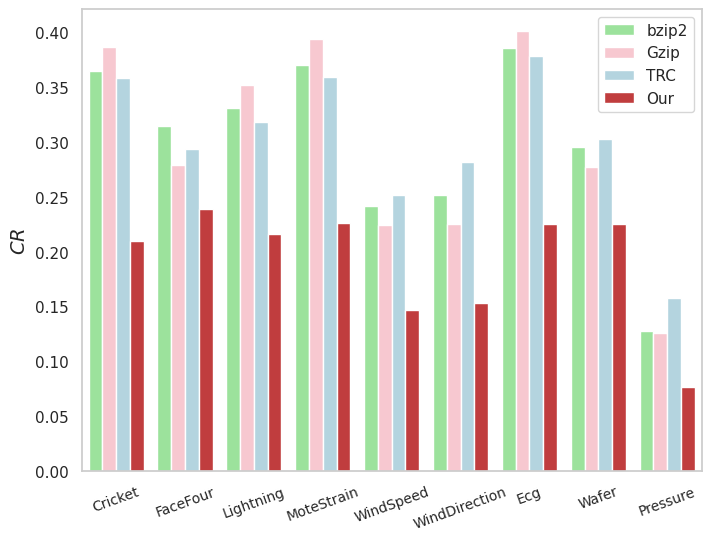

/home/guoyou/ExtractSemantic/figure/crLossless.pdf


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the line plot
datasets = ['Cricket', 'FaceFour', 'Lightning', 'MoteStrain', 'WindSpeed', 'WindDirection', 'Ecg', 'Wafer', 'Pressure']
bzip2 = [0.3651, 0.3142, 0.3314, 0.3698, 0.2414, 0.2515,  0.386, 0.2951, 0.1276]
Gzip = [0.387, 0.279, 0.352, 0.394, 0.224, 0.225, 0.401, 0.277, 0.126]
TRC = [0.358, 0.294, 0.318, 0.359, 0.252, 0.282,  0.378, 0.303, 0.158]
Our = [0.20955, 0.23876, 0.21648, 0.22622, 0.14673, 0.15336,  0.225, 0.22546, 0.07638]

# Constructing a DataFrame
df = pd.DataFrame({
    'Dataset': datasets,
    'bzip2': bzip2,
    'Gzip': Gzip,
    'TRC': TRC,
    'Our': Our
})

# Convert data to a long-form DataFrame
df_long = pd.melt(df, id_vars='Dataset', var_name='Method', value_name='Compression Ratio')

# Initialize the matplotlib figure
plt.figure(figsize=(8, 6))  # Remove subplots

# Set color palette and hatches
color_palette = sns.color_palette('tab10')
palette = ['lightgreen', 'pink', 'lightblue', color_palette[3]]
hatches = ['\\', '////', '//////', '']

# Plot the bars using Seaborn's barplot
bar = sns.barplot(x="Dataset", y="Compression Ratio", hue="Method", data=df_long, palette=palette)

# Customizing the plot to replicate the style of the provided image
ax = plt.gca()
ax.set_ylabel(r'$CR$', fontsize=14)  # Set the name of the Y-axis
#ax.set_title('Compression Ratio when lossless')
ax.set_xlabel('')  # Remove the x-axis title
ax.legend(loc='upper right')
legend = ax.legend(loc='upper right')  # Set the legend location
plt.grid(False)  # Turn off the grid for a cleaner look

#plt.tight_layout()
# Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/crLossless.pdf'
plt.xticks(rotation=20, fontsize=10)  # Rotate x-axis labels to avoid overlapping
plt.savefig(pdf_filename, format='pdf')

plt.show()

# The path to the saved PDF file
print(pdf_filename)


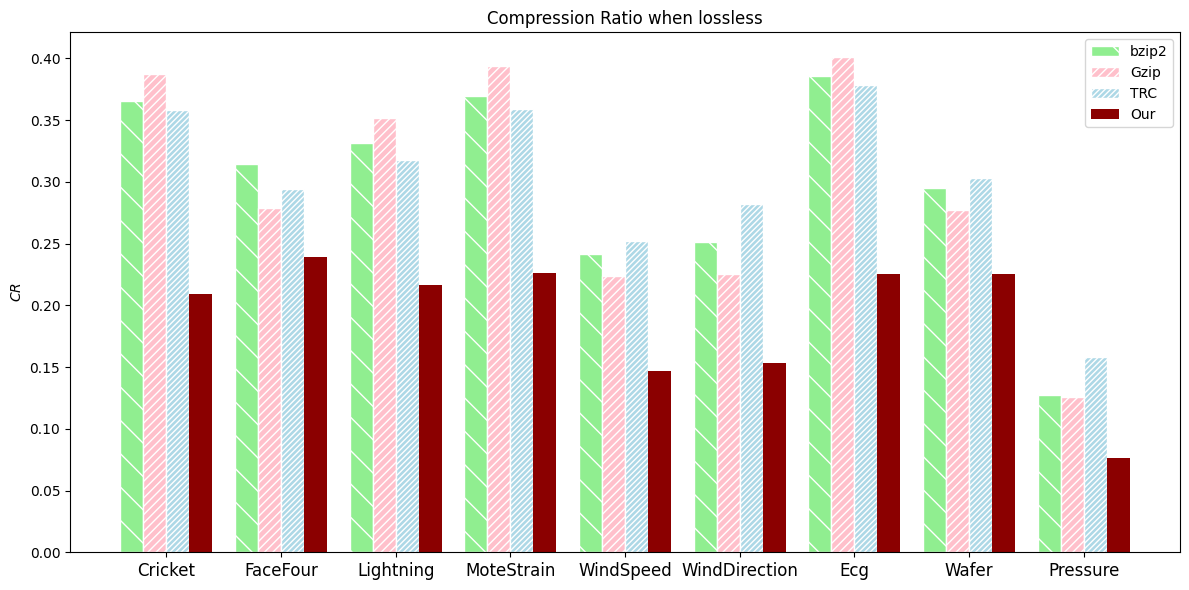

'/home/guoyou/ExtractSemantic/figure/crLossless.pdf'

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the line plot
datasets = ['Cricket', 'FaceFour', 'Lightning', 'MoteStrain', 'WindSpeed', 'WindDirection', 'Ecg', 'Wafer', 'Pressure']
bzip2 = [0.3651, 0.3142, 0.3314, 0.3698, 0.2414, 0.2515,  0.386, 0.2951, 0.1276]
Gzip = [0.387, 0.279, 0.352, 0.394, 0.224, 0.225, 0.401, 0.277, 0.126]
QuanTRC = [0.358, 0.294, 0.318, 0.359, 0.252, 0.282,  0.378, 0.303, 0.158]
Our = [0.20955, 0.23876, 0.21648, 0.22622, 0.14673, 0.15336,  0.225, 0.22546, 0.07638]

# Constructing a DataFrame
df = pd.DataFrame({
    'Dataset': datasets,
    'bzip2': bzip2,
    'Gzip': Gzip,
    'TRC': QuanTRC,
    'Our': Our
})

# Setting the positions and width for the bars
pos = list(range(len(df['Dataset'])))
bar_width = 0.2

# Plotting the bars
fig, ax = plt.subplots(figsize=(12, 6))

# Customizing the plot to replicate the style of the provided image
color_palette = sns.color_palette('tab10')
colors = ['lightgreen', 'pink', 'lightblue', color_palette[3]]
hatches = ['', '', '///', '///']


plt.bar(pos, df['bzip2'], bar_width, label='bzip2', color='lightgreen', edgecolor='white', hatch="\\")
plt.bar([p + bar_width for p in pos], df['Gzip'], bar_width, label='Gzip', color='pink', edgecolor='white', hatch="////")
plt.bar([p + bar_width*2 for p in pos], df['TRC'], bar_width, label='TRC', color='lightblue', edgecolor='white', hatch="//////")
plt.bar([p + bar_width*3 for p in pos], df['Our'], bar_width, label='Our', color='darkred')

# Setting axis labels and ticks
#ax.set_ylabel('Compression Ratio')
ax.set_ylabel(r'$CR$')  # Set the name of the X-axis here
ax.set_title('Compression Ratio when lossless')
ax.set_xticks([p + 1.5 * bar_width for p in pos])
ax.set_xticklabels(df['Dataset'], fontsize=12)

plt.legend(loc='upper right')
plt.grid(False)
plt.tight_layout()

# Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/crLossless.pdf'
plt.savefig(pdf_filename, format='pdf')

plt.show()

# The path to the saved PDF file
pdf_filename


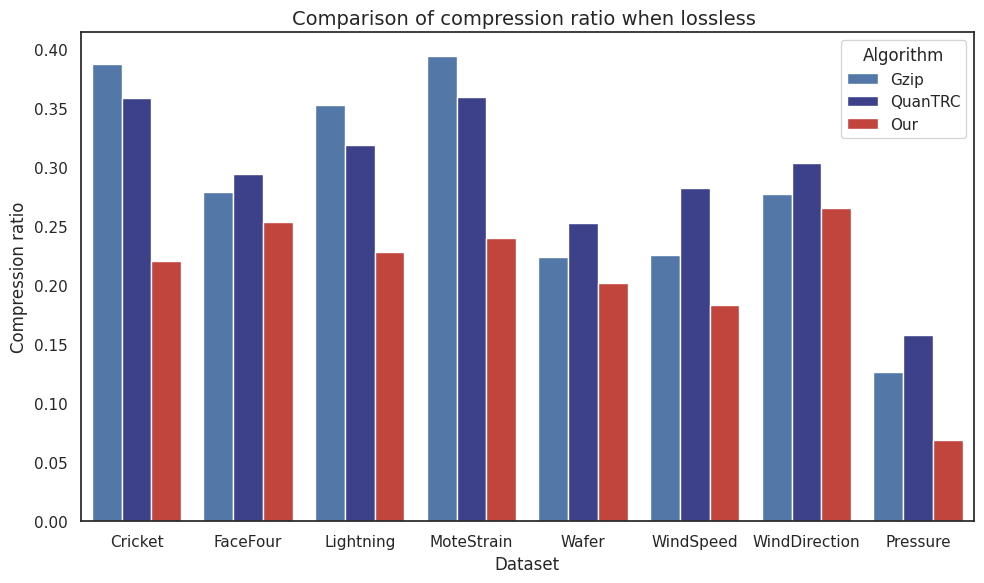

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置seaborn风格为白色背景
sns.set(style="white", color_codes=True)

# 准备数据
dataset_names = ['Cricket', 'FaceFour', 'Lightning', 'MoteStrain', 'Wafer', 'WindSpeed', 'WindDirection', 'Pressure']
results = {
    'Gzip': [0.387, 0.279, 0.352, 0.394, 0.224, 0.225, 0.277, 0.126],
    'QuanTRC': [0.358, 0.294, 0.318, 0.359, 0.252, 0.282, 0.303, 0.158],
    'Our': [0.22, 0.253, 0.228, 0.24, 0.202, 0.183, 0.265, 0.069]
}
df = pd.DataFrame(results, index=dataset_names).reset_index().melt(id_vars='index', var_name='Algorithm', value_name='Result')

# 创建图表
plt.figure(figsize=(10, 6))
#barplot = sns.barplot(x='index', y='Result', hue='Algorithm', data=df)
barplot = sns.barplot(x='index', y='Result', hue='Algorithm', data=df, palette={'Gzip': "#4575b4", 'QuanTRC': "#313695", 'Our': "#d73027"})


# 去除网格
barplot.grid(False)

# 设置图表标签和标题
barplot.set_xlabel('Dataset', fontsize=12)
barplot.set_ylabel('Compression ratio', fontsize=12)
barplot.set_title('Comparison of compression ratio when lossless ', fontsize=14)

# 设置图例标题
barplot.legend(title='Algorithm')

# 优化布局
plt.tight_layout()


# Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/crLossless.pdf'
plt.savefig(pdf_filename, format='pdf')

# 显示图表
plt.show()


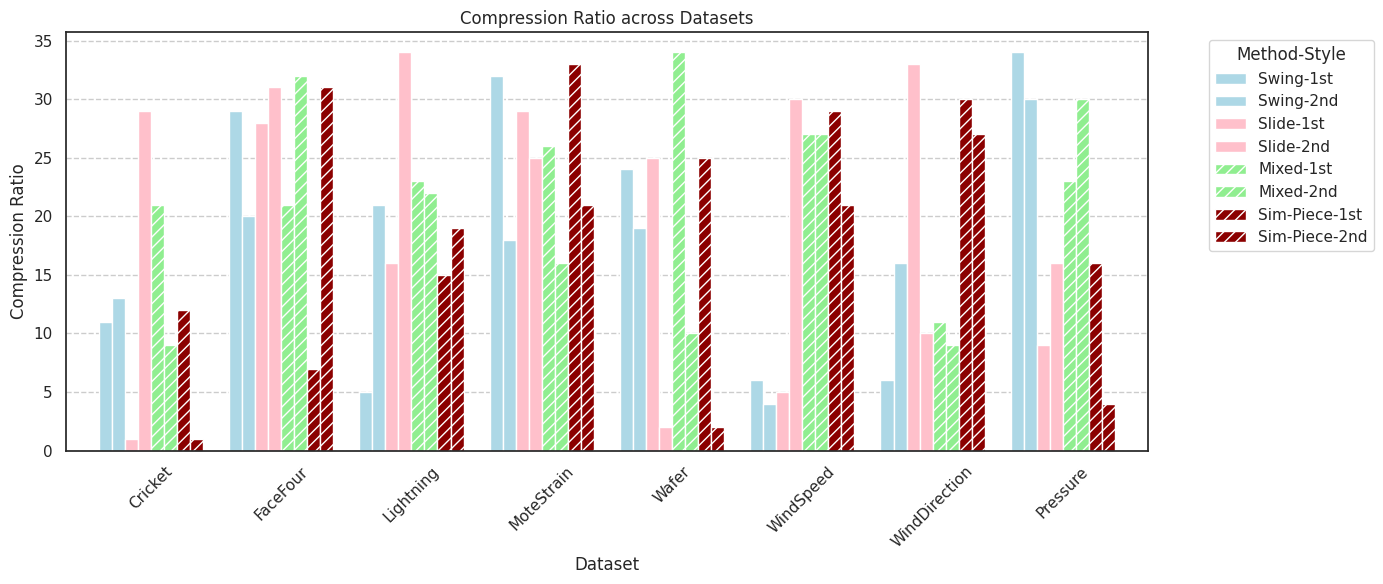

'/mnt/data/compression_ratio_bars.png'

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Dummy data created to replicate the bar plot. Replace with actual data.
methods = ['Swing', 'Slide', 'Mixed', 'Sim-Piece']
styles = ['1st', '2nd']
datasets = ['Cricket', 'FaceFour', 'Lightning', 'MoteStrain', 'Wafer', 'WindSpeed', 'WindDirection', 'Pressure']
values = np.random.randint(1, 35, size=(len(methods) * len(styles), len(datasets)))

# Create a DataFrame to hold the data
data = {'Dataset': datasets}
for idx, method in enumerate(methods):
    for style in styles:
        data[f'{method}-{style}'] = values[idx * len(styles) + (0 if style == '1st' else 1)]

df = pd.DataFrame(data)
df = df.set_index('Dataset')

# Plotting
ax = df.plot(kind='bar', figsize=(14, 6), width=0.8)

# Customizing the plot to replicate the style of the provided image
colors = ['lightblue', 'pink', 'lightgreen', 'darkred']
hatches = ['', '', '///', '///']

# Adding colors and hatches to the bars
for i, bar in enumerate(ax.patches):
    bar.set_facecolor(colors[i // (2 * len(datasets))])
    bar.set_hatch(hatches[i // (2 * len(datasets))])

# Further customization
plt.title('Compression Ratio across Datasets')
plt.ylabel('Compression Ratio')
plt.xlabel('Dataset')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.legend(title='Method-Style', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save and show plot
plt.tight_layout()
#plt.savefig('/mnt/data/compression_ratio_bars.png')
plt.show()

# The path to the saved plot
'/mnt/data/compression_ratio_bars.png'


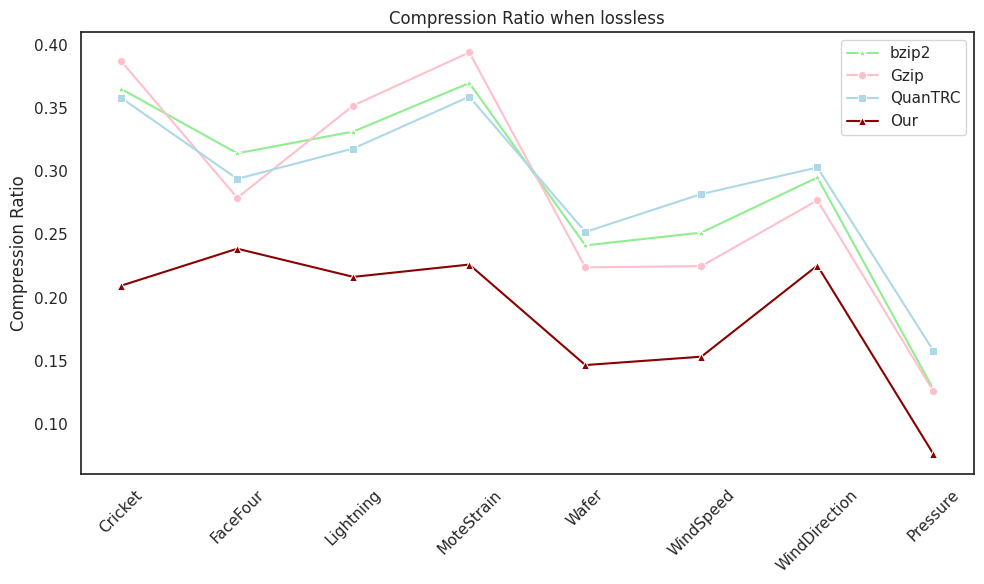

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 数据集名称
datasets = ['Cricket', 'FaceFour', 'Lightning', 'MoteStrain', 'Wafer', 'WindSpeed', 'WindDirection', 'Pressure']

# 每种算法在每个数据集上的压缩率数据
bzip2 = [ 0.3651, 0.3142, 0.3314, 0.3698, 0.2414, 0.2515, 0.2951,  0.1276]
Gzip =  [0.387, 0.279, 0.352, 0.394, 0.224, 0.225, 0.277, 0.126]
QuanTRC = [0.358, 0.294, 0.318, 0.359, 0.252, 0.282, 0.303, 0.158]
Our = [ 0.20955, 0.23876, 0.21648,  0.22622, 0.14673, 0.15336, 0.22546, 0.07638]

# 构建一个DataFrame
df = pd.DataFrame({
    'Dataset': datasets * 4,
    'Compression Ratio':bzip2 + Gzip  + QuanTRC + Our ,
    'Method': ['bzip2'] * len(datasets) +['Gzip'] * len(datasets) + ['QuanTRC'] * len(datasets) + ['Our'] * len(datasets)
})

# Define a custom color palette to make Method 3 stand out
palette = {'bzip2':"lightgreen", "Gzip": "pink", "QuanTRC": "lightblue", "Our": "darkred"}

# Define markers for each method
markers = {'bzip2':"*", "Gzip": "^", "QuanTRC": "s", "Our": "o"}

# Set the style of the visualization
sns.set_style("white")

# 创建折线图
plt.figure(figsize=(10, 6))

# 分别为每种方法绘制折线图
sns.lineplot(data=df[df['Method'] == 'bzip2'], x='Dataset', y='Compression Ratio', color='lightgreen', marker='*', linestyle='-', label='bzip2')
sns.lineplot(data=df[df['Method'] == 'Gzip'], x='Dataset', y='Compression Ratio', color='pink', marker='o', linestyle='-', label='Gzip')
sns.lineplot(data=df[df['Method'] == 'QuanTRC'], x='Dataset', y='Compression Ratio', color='lightblue', marker='s', linestyle='-', label='QuanTRC')
sns.lineplot(data=df[df['Method'] == 'Our'], x='Dataset', y='Compression Ratio', color='darkred', marker='^', linestyle='-', label='Our')

# 设置图表标题和轴标签
plt.title('Compression Ratio when lossless')
#plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Compression Ratio', fontsize=12)

# 不显示x轴标签 "Dataset"
plt.xlabel('')  # Removes x-axis label

# 显示图表
plt.xticks(rotation=45)  # 旋转x轴标签以更好地显示
plt.tight_layout()

# Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/crLossless.pdf'
plt.savefig(pdf_filename, format='pdf')

plt.show()


### 2. Line plot for lossy

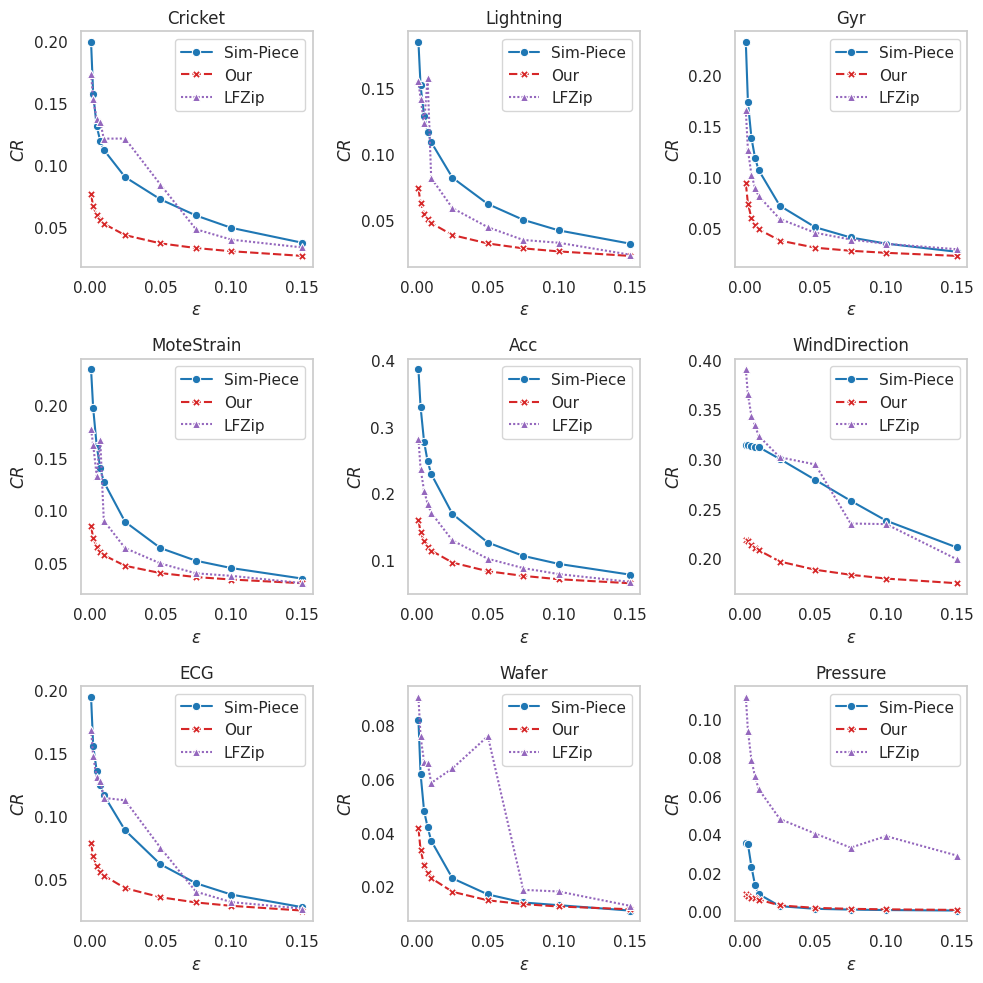

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Epsilon values and datasets
epsilon_values = [0.15, 0.1, 0.075, 0.05, 0.025, 0.01, 0.0075, 0.005, 0.0025, 0.001]
datasets = ['Cricket',  'Lightning', 'Gyr', 'MoteStrain',  'Acc', 'WindDirection', 'ECG', 'Wafer','Pressure']

# Compression ratio values for 'Sim-Piece' for each dataset
sim_piece_values = {
    'Cricket': [0.037, 0.049, 0.059, 0.072, 0.090, 0.112, 0.119, 0.131, 0.157, 0.199],
    'Lightning': [0.032,0.042,0.050,0.062,0.082,0.109,0.117,0.129,0.152,0.185],
    'Gyr':[0.027 , 0.035 , 0.041 , 0.051 , 0.072 , 0.107 , 0.119 , 0.138 , 0.173 , 0.232 ],
    'MoteStrain': [0.035,0.045,0.052,0.064,0.089,0.127,0.140,0.161,0.197,0.234],
    'Acc': [0.078 , 0.094 , 0.106 , 0.126 , 0.169 , 0.229 , 0.248 , 0.277 , 0.330 , 0.386 ],
    'WindDirection': [0.211,0.238,0.258,0.279,0.300,0.312,0.312,0.313,0.314,0.314],
    'ECG': [0.028, 0.038, 0.047, 0.062, 0.089, 0.117, 0.125, 0.136, 0.156, 0.195,],
    'Wafer': [0.011,0.013,0.014,0.017,0.023,0.037,0.042,0.048,0.062,0.082],
    'Pressure': [0.00034,0.00060,0.00084,0.00124,0.00262,0.00896,0.01361,0.02301,0.03486,0.03517]
}

our_values = {
    'Cricket': [0.02638,0.03014,0.03272,0.03650,0.04314,0.05231,0.05516,0.05920,0.06639,0.07596],
    'Lightning':[0.02263,0.02603,0.02835,0.03204,0.03845,0.04756,0.05047,0.05481,0.06274,0.07395],
    'Gyr':[0.023, 0.026, 0.028, 0.031, 0.038, 0.049, 0.053, 0.060, 0.074, 0.094],
    'MoteStrain':[0.03058,0.03412,0.03644,0.04022,0.04717,0.05723,0.06047,0.06532,0.07375,0.08461],
    'Acc': [0.065, 0.071, 0.076, 0.083, 0.096, 0.114, 0.120, 0.128, 0.142, 0.160],
    'WindDirection':[0.17507,0.17974,0.18357,0.18862,0.19689,0.20835,0.21064,0.21392,0.21789,0.21871],
    'ECG': [0.02531, 0.02906, 0.03174, 0.03587, 0.04310, 0.05310, 0.05622, 0.06056, 0.06834, 0.07878],
    'Wafer':[0.01149,0.01251,0.01339,0.01481,0.01799,0.02307,0.02497,0.02790,0.03364,0.04169],
    'Pressure':[0.00068,0.00097,0.00124,0.00173,0.00302,0.00607,0.00708,0.00710,0.00808,0.00912]
}

LFZip_values = {
    'Cricket': [0.0332, 0.0395, 0.0479, 0.0839, 0.1211, 0.121, 0.1345, 0.1366, 0.153, 0.1733],
    'Lightning':[0.0236, 0.0326, 0.0347, 0.0444, 0.0589, 0.0818, 0.1574, 0.1237, 0.1419, 0.1553],
    'Gyr':[0.0295, 0.0348, 0.039, 0.0456, 0.0591, 0.0816, 0.0897, 0.102, 0.1264, 0.1652],
    'MoteStrain':[0.0307	,0.0376	,0.04, 0.0494,0.064	,0.0901	,0.1664	,0.1325	,0.1621	,0.177	],
    'Acc': [0.0671, 0.0787, 0.0877, 0.1017, 0.1292, 0.1707, 0.1842, 0.2035, 0.237, 0.2821],
    'WindDirection':[0.1991, 0.2345, 0.2351, 0.2945, 0.3017, 0.3233, 0.3338, 0.3429, 0.3649, 0.3901],
    'ECG': [0.0269, 0.032, 0.0403, 0.0751, 0.1128, 0.1147, 0.1281, 0.131, 0.1477, 0.1688],
    'Wafer':[0.0128, 0.0181, 0.0187, 0.0759, 0.0639, 0.0585, 0.066, 0.0664, 0.0758, 0.0906],
    'Pressure':[0.0289, 0.039, 0.033, 0.0403, 0.0479, 0.0635, 0.07, 0.0784, 0.0937, 0.1114]
}

# Construct the DataFrame
rows = []
for dataset in datasets:
    for epsilon in epsilon_values:
        # Append 'Sim-Piece' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Sim-Piece',
            'Epsilon': epsilon,
            'Compression Ratio': sim_piece_values[dataset][epsilon_values.index(epsilon)]
        })
        # Append 'Our' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Our',
            'Epsilon': epsilon,
            'Compression Ratio': our_values[dataset][epsilon_values.index(epsilon)]
        })
        # Append 'LFZip' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'LFZip',
            'Epsilon': epsilon,
            'Compression Ratio': LFZip_values[dataset][epsilon_values.index(epsilon)]
        })

df = pd.DataFrame(rows)

# Define the plotting style
sns.set(style="whitegrid")
markers = {'Sim-Piece': 'o', 'Our': 'X', 'LFZip': '^'}

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=False, sharey=False)
axes = axes.flatten()

color_palette = sns.color_palette('tab10')
palette = [color_palette[0], color_palette[3], color_palette[4]]

# Plot each dataset
for i, dataset in enumerate(datasets):
    ax = axes[i]
    sns.lineplot(data=df[df['Dataset'] == dataset], x='Epsilon', y='Compression Ratio',
                 hue='Method',style='Method',  markers=markers, ax=ax, palette=palette) 
    ax.set_title(dataset)
    ax.set_xlabel(r'$\epsilon$')  # Set the name of the X-axis here
    ax.set_ylabel(r'$CR$')  # Set the name of the X-axis here
    axes[i].grid(False)  # Turn off the grid
    

# Remove extra subplots if datasets are less than 9
for j in range(i + 1, 9):
    fig.delaxes(axes[j])

# Iterate through the axes to remove the legend title
for ax in fig.axes:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels)

plt.tight_layout()

# Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/crlossy.pdf'
plt.savefig(pdf_filename, format='pdf')


plt.show()

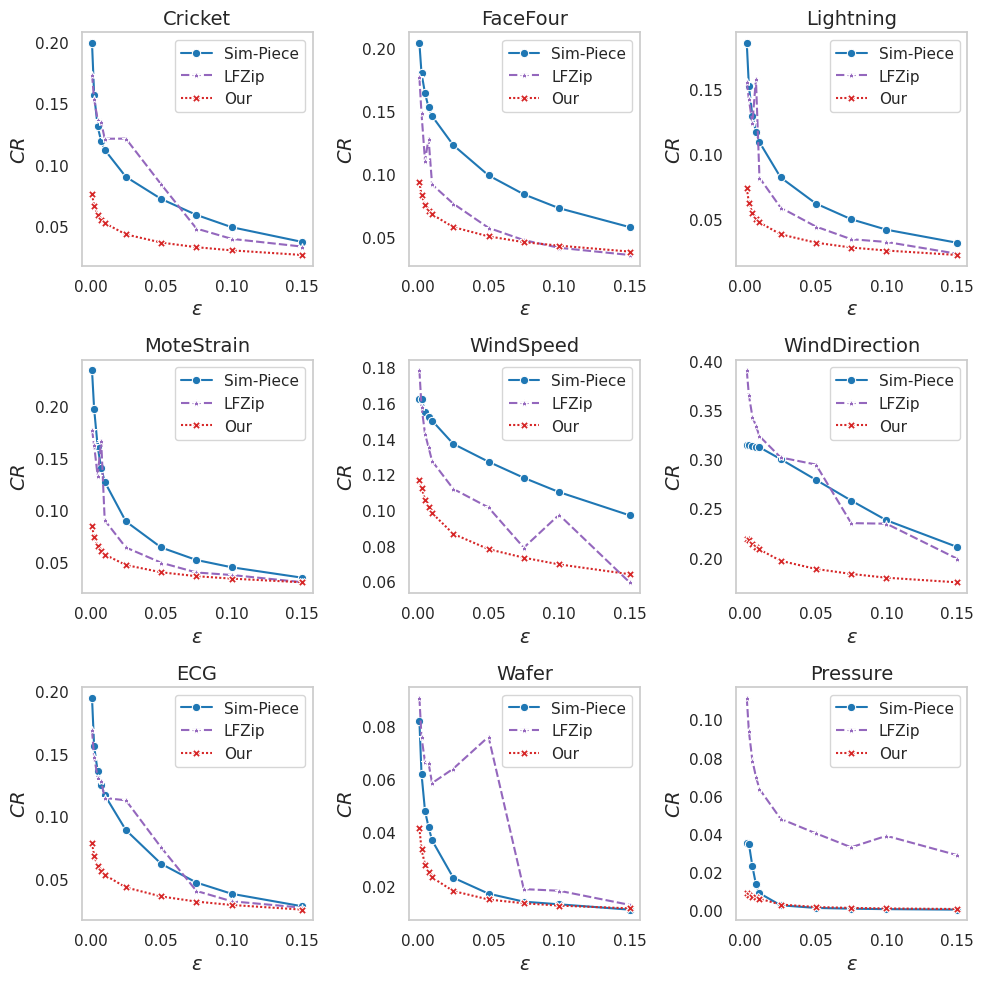

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Epsilon values and datasets
epsilon_values = [0.15, 0.1, 0.075, 0.05, 0.025, 0.01, 0.0075, 0.005, 0.0025, 0.001]
datasets = ['Cricket', 'FaceFour', 'Lightning', 'MoteStrain',  'WindSpeed', 'WindDirection', 'ECG', 'Wafer','Pressure']

# Compression ratio values for 'Sim-Piece' for each dataset
sim_piece_values = {
    'Cricket': [0.037, 0.049, 0.059, 0.072, 0.090, 0.112, 0.119, 0.131, 0.157, 0.199],
    'FaceFour':[0.058,0.073,0.084,0.099,0.123,0.146,0.153,0.164,0.180,0.204],
    'Lightning': [0.032,0.042,0.050,0.062,0.082,0.109,0.117,0.129,0.152,0.185],
    'MoteStrain': [0.035,0.045,0.052,0.064,0.089,0.127,0.140,0.161,0.197,0.234],
    'WindSpeed': [0.097,0.110,0.118,0.127,0.137,0.150,0.152,0.155,0.162,0.162],
    'WindDirection': [0.211,0.238,0.258,0.279,0.300,0.312,0.312,0.313,0.314,0.314],
    'ECG': [0.028, 0.038, 0.047, 0.062, 0.089, 0.117, 0.125, 0.136, 0.156, 0.195,],
    'Wafer': [0.011,0.013,0.014,0.017,0.023,0.037,0.042,0.048,0.062,0.082],
    'Pressure': [0.00034,0.00060,0.00084,0.00124,0.00262,0.00896,0.01361,0.02301,0.03486,0.03517]
}

our_values = {
    'Cricket': [0.02638,0.03014,0.03272,0.03650,0.04314,0.05231,0.05516,0.05920,0.06639,0.07596],
    'FaceFour':[0.03860,0.04330,0.04609,0.05066,0.05802,0.06806,0.07100,0.07544,0.08329,0.09396],
    'Lightning':[0.02263,0.02603,0.02835,0.03204,0.03845,0.04756,0.05047,0.05481,0.06274,0.07395],
    'MoteStrain':[0.03058,0.03412,0.03644,0.04022,0.04717,0.05723,0.06047,0.06532,0.07375,0.08461],
    'WindSpeed':[0.06403,0.06954,0.07328,0.07806,0.08661,0.09826,0.10145,0.10581, 0.11250,0.11705],
    'WindDirection':[0.17507,0.17974,0.18357,0.18862,0.19689,0.20835,0.21064,0.21392,0.21789,0.21871],
    'ECG': [0.02531, 0.02906, 0.03174, 0.03587, 0.04310, 0.05310, 0.05622, 0.06056, 0.06834, 0.07878],
    'Wafer':[0.01149,0.01251,0.01339,0.01481,0.01799,0.02307,0.02497,0.02790,0.03364,0.04169],
    'Pressure':[0.00068,0.00097,0.00124,0.00173,0.00302,0.00607,0.00708,0.00710,0.00808,0.00912]
}

LFZip_values = {
    'Cricket': [0.0332, 0.0395, 0.0479, 0.0839, 0.1211, 0.121, 0.1345, 0.1366, 0.153, 0.1733],
    'FaceFour':[0.0359, 0.0416, 0.0477, 0.0574, 0.0766, 0.0918, 0.1282, 0.1105, 0.1482, 0.1766],
    'Lightning':[0.0236, 0.0326, 0.0347, 0.0444, 0.0589, 0.0818, 0.1574, 0.1237, 0.1419, 0.1553],
    'MoteStrain':[0.0307	,0.0376	,0.04, 0.0494,0.064	,0.0901	,0.1664	,0.1325	,0.1621	,0.177	],
    'WindSpeed':[0.0595, 0.0973, 0.0789, 0.1014, 0.1118, 0.1274, 0.1351, 0.1426, 0.1579, 0.1782],
    'WindDirection':[0.1991, 0.2345, 0.2351, 0.2945, 0.3017, 0.3233, 0.3338, 0.3429, 0.3649, 0.3901],
    'ECG': [0.0269, 0.032, 0.0403, 0.0751, 0.1128, 0.1147, 0.1281, 0.131, 0.1477, 0.1688],
    'Wafer':[0.0128, 0.0181, 0.0187, 0.0759, 0.0639, 0.0585, 0.066, 0.0664, 0.0758, 0.0906],
    'Pressure':[0.0289, 0.039, 0.033, 0.0403, 0.0479, 0.0635, 0.07, 0.0784, 0.0937, 0.1114]
}

# Construct the DataFrame
rows = []
for dataset in datasets:
    for epsilon in epsilon_values:
        # Append 'Sim-Piece' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Sim-Piece',
            'Epsilon': epsilon,
            'Compression Ratio': sim_piece_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'LFZip' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'LFZip',
            'Epsilon': epsilon,
            'Compression Ratio': LFZip_values[dataset][epsilon_values.index(epsilon)]
        })
        # Append 'Our' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Our',
            'Epsilon': epsilon,
            'Compression Ratio': our_values[dataset][epsilon_values.index(epsilon)]
        })

df = pd.DataFrame(rows)

# Define the plotting style
sns.set(style="whitegrid")
markers = {'Sim-Piece': 'o', 'LFZip': '*', 'Our': 'X'}

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=False, sharey=False)
axes = axes.flatten()

color_palette = sns.color_palette('tab10')
palette = [color_palette[0], color_palette[4], color_palette[3]]

# Plot each dataset
for i, dataset in enumerate(datasets):
    ax = axes[i]
    sns.lineplot(data=df[df['Dataset'] == dataset], x='Epsilon', y='Compression Ratio',
                 hue='Method',style='Method',  markers=markers, ax=ax, palette=palette) 
    ax.set_title(dataset, fontsize=14)
    ax.set_xlabel(r'$\epsilon$', fontsize=14)  # Set the name of the X-axis here
    ax.set_ylabel(r'$CR$', fontsize=14)  # Set the name of the X-axis here
    axes[i].grid(False)  # Turn off the grid
    

# Remove extra subplots if datasets are less than 9
for j in range(i + 1, 9):
    fig.delaxes(axes[j])

# Iterate through the axes to remove the legend title
for ax in fig.axes:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels)

plt.tight_layout()

# Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/crlossy.pdf'
plt.savefig(pdf_filename, format='pdf')


plt.show()

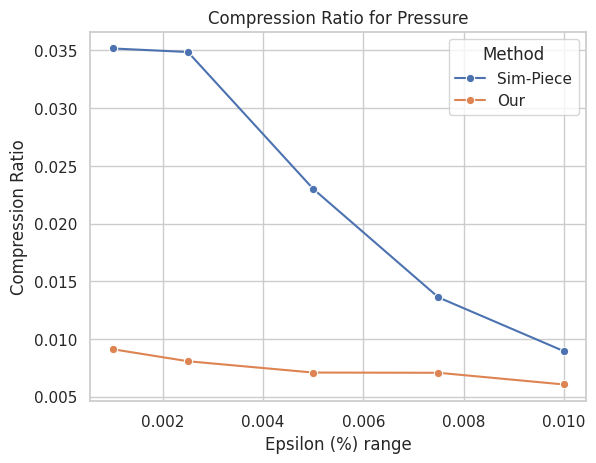

In [49]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

epsilon_values = [0.01, 0.0075, 0.005, 0.0025, 0.001]
datasets = [ 'Pressure']

# Compression ratio values for 'Sim-Piece' for each dataset
sim_piece_values = {
    'Pressure':[0.00896,0.01361,0.02301,0.03486,0.03517]
}

our_values = {
    'Pressure':[0.00607,0.00708,0.00710,0.00808,0.00912]
}

# Sample data structure
data = {
    'Epsilon': [0.001, 0.0025, 0.005, 0.0075, 0.01],  # Replace with actual epsilon values
    'Sim-Piece': [0.03517, 0.03486, 0.02301, 0.01361, 0.00896],  # Replace with actual data
    'Our': [0.00912, 0.00808, 0.00710, 0.00708, 0.00607]
}

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Convert the DataFrame to long format for seaborn
df_long = pd.melt(df, id_vars=['Epsilon'], var_name='Method', value_name='Compression Ratio')

# Create the line plot
sns.lineplot(data=df_long, x='Epsilon', y='Compression Ratio', hue='Method', marker='o')

# Additional plot customizations can be added here as needed
plt.title('Compression Ratio for Pressure')
plt.xlabel('Epsilon (%) range')
plt.ylabel('Compression Ratio')

# Show the plot
plt.show()


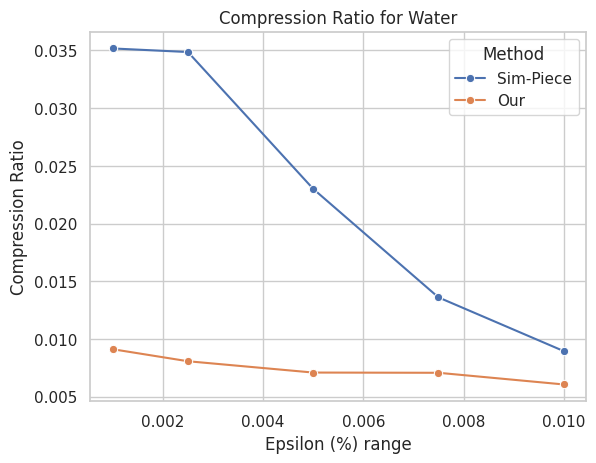

In [50]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

epsilon_values = [0.01, 0.0075, 0.005, 0.0025, 0.001]
datasets = [ 'Water']

# Compression ratio values for 'Sim-Piece' for each dataset
sim_piece_values = {
    'Water': [ 0.037,0.042,0.048,0.062,0.082]
}

our_values = {
    'Water':[0.02307,0.02497,0.02790,0.03364,0.04169]
}

# Sample data structure
data = {
    'Epsilon': [0.001, 0.0025, 0.005, 0.0075, 0.01],  # Replace with actual epsilon values
    'Sim-Piece': [0.03517, 0.03486, 0.02301, 0.01361, 0.00896],  # Replace with actual data
    'Our': [0.00912, 0.00808, 0.00710, 0.00708, 0.00607]
}

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Convert the DataFrame to long format for seaborn
df_long = pd.melt(df, id_vars=['Epsilon'], var_name='Method', value_name='Compression Ratio')

# Create the line plot
sns.lineplot(data=df_long, x='Epsilon', y='Compression Ratio', hue='Method', marker='o')

# Additional plot customizations can be added here as needed
plt.title('Compression Ratio for Water')
plt.xlabel('Epsilon (%) range')
plt.ylabel('Compression Ratio')

# Show the plot
plt.show()


### 4、处理新数据

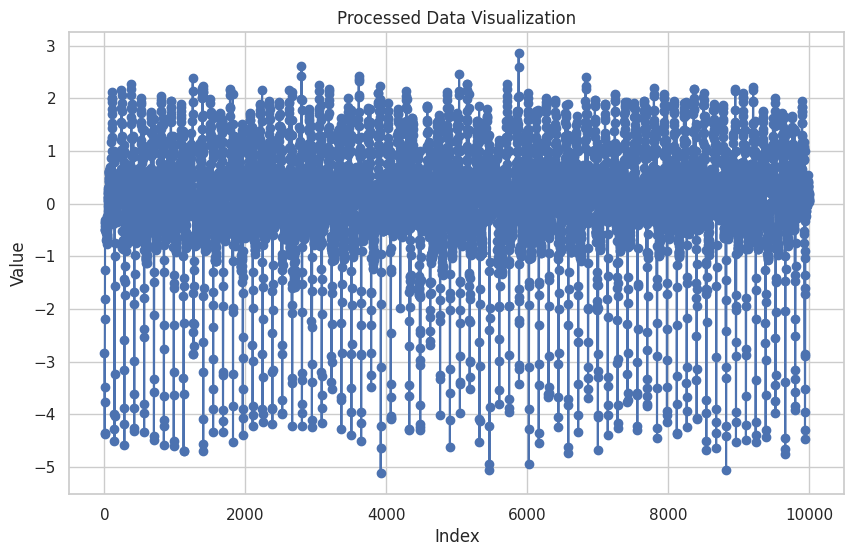

In [51]:
import pandas as pd
import matplotlib.pyplot as plt


# 读取数据文件
file_path = '/home/guoyou/ExtractSemantic/Data/Ecg.csv'  # 替换为你的文件路径
data = pd.read_csv(file_path, header=None)  # 假设文件没有标题行

# 将第一列以外的数据依次放到第一列下面
reshaped_data = data.iloc[:, 1:].stack().reset_index(drop=True).to_frame()

# 创建新的一列，包含从1开始的连续整数
reshaped_data['index'] = range(1, len(reshaped_data) + 1)

# 调整列的顺序
reshaped_data = reshaped_data[['index', 0]]

# 保存到新文件
output_file_path = '/home/guoyou/ExtractSemantic/Data/Ecg.csv'  # 输出文件的路径
reshaped_data.to_csv(output_file_path, index=False, header=False)

data = pd.read_csv(output_file_path, header=None)

# 设置图形
plt.figure(figsize=(10, 6))

# 绘制折线图
plt.plot(data[0][:10000], data[1][:10000], marker='o')  # data[0] 是x轴（连续整数），data[1] 是y轴（数据值）

# 设置标题和轴标签
plt.title("Processed Data Visualization")
plt.xlabel("Index")
plt.ylabel("Value")

# 显示图形
plt.show()


### 5、Speed

In [52]:
ourAverageTime = [1567.80, 
126.80,
280.50,
299.90,
15121.20,
11479.30,
1837.60,
2450.00,
18896.80
]
simpieceAverageTime = [4114.00  ,
183.80	,	
606.10	,	
536.30	,	
27781.80,	
7051.10,
3730.30,
4436.40,
36873.70
]

size = [12.78,0.67, 2.19, 1.85, 53.23, 16.35,  12.02, 19.64, 214.79]

print("Our: ")
for i,t in enumerate(ourAverageTime):
    print(size[i]*1024/t)

print("Sim-piece: ")
for i,t in enumerate(simpieceAverageTime):
    print(size[i]*1024/t)



Our: 
8.347187141216992
5.410725552050474
7.994866310160428
6.3167722574191405
3.604708621008914
1.4584861446255435
6.698127993034393
8.20871836734694
11.63927014097625
Sim-piece: 
3.1810209042294604
3.732752992383025
3.6999835010724302
3.5323512959164654
1.961986624336796
2.374438030945526
3.2995952068198267
4.533261202777027
5.964819369903211


### 6、Decompress time

/tmp/ipykernel_2225931/3127868806.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df.index, rotation=40, ha='right', fontweight='bold')
/tmp/ipykernel_2225931/3127868806.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df.index, rotation=40, ha='right', fontweight='bold')


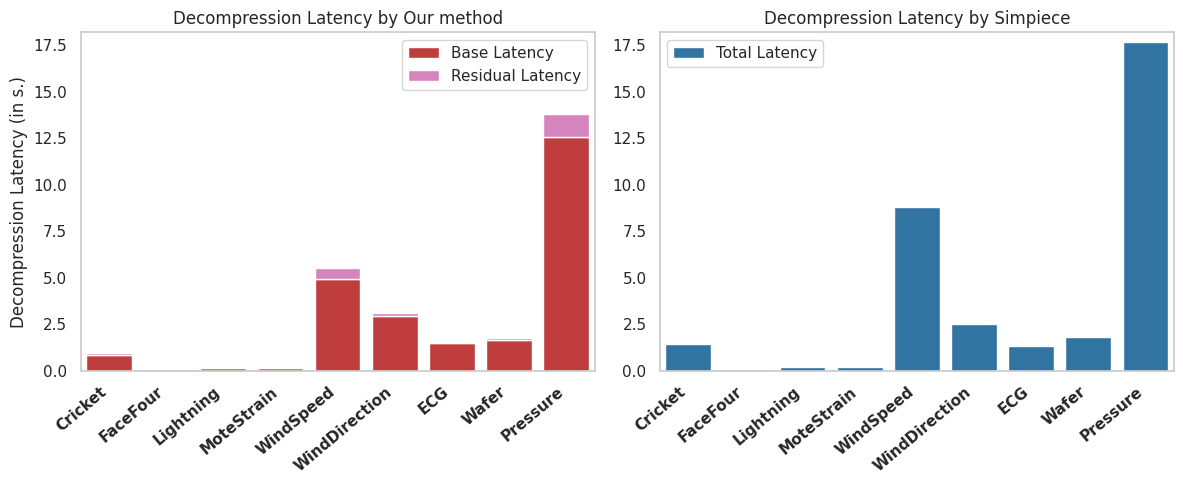

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Example DataFrame with sample data. Replace this with your actual data.
data = {
    'Base':     [0.86, 0.053, 0.1688, 0.1493, 4.9136,  2.9554, 1.4769, 1.6717, 12.569],
    'Residual': [0.08, 0.014, 0.0226, 0.02,   0.604, 0.1519,  0.09, 0.1113, 1.2314]
}
df = pd.DataFrame(data, index=['Cricket', 'FaceFour', 'Lightning', 'MoteStrain', 'WindSpeed', 'WindDirection', 'ECG', 'Wafer', 'Pressure'])

# Total latency values
total_latency = [1.442, 0.058, 0.207, 0.2, 8.812, 2.543, 1.357, 1.817, 17.689]

# Set the width of each bar
bar_width = 0.3

color_palette = sns.color_palette('tab10')
palette = [color_palette[0], color_palette[3]]

# Create a figure and a set of subplots with a larger figure size for better readability
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))


# Plot each row as a stacked bar on the first subplot using Seaborn
sns.barplot(x=df.index, y=df['Base'], ax=ax1, label='Base Latency', color=color_palette[3])
sns.barplot(x=df.index, y=df['Residual'], ax=ax1, bottom=df['Base'], label='Residual Latency', color=color_palette[6])
ax1.set_ylabel('Decompression Latency (in s.)')
ax1.set_title('Decompression Latency by Our method')
ax1.legend()

# Plot a single bar for the total latency on the second subplot
sns.barplot(x=df.index, y=total_latency, ax=ax2, label='Total Latency', color=color_palette[0])
ax2.set_title('Decompression Latency by Simpiece')
ax2.legend()

# Find the maximum value to set the same y-axis limits for both subplots
max_value = max(df['Base'] + df['Residual'])
max_y_lim = max(max_value, max(total_latency)) + 0.5

# Set the same y-axis limits for both subplots
ax1.set_ylim(0, max_y_lim)
ax2.set_ylim(0, max_y_lim)

# Align the x-axis labels for both subplots
ax1.set_xticklabels(df.index, rotation=40, ha='right', fontweight='bold')
ax2.set_xticklabels(df.index, rotation=40, ha='right', fontweight='bold')

ax1.grid(False)
ax2.grid(False)


# Remove x-axis titles
ax1.set_xlabel('')
ax2.set_xlabel('')


# Adjust the layout to fit everything neatly
plt.tight_layout()

# Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/decompTime.pdf'
plt.savefig(pdf_filename, format='pdf')

# Display the plot
plt.show()


### 7、Entropy compress

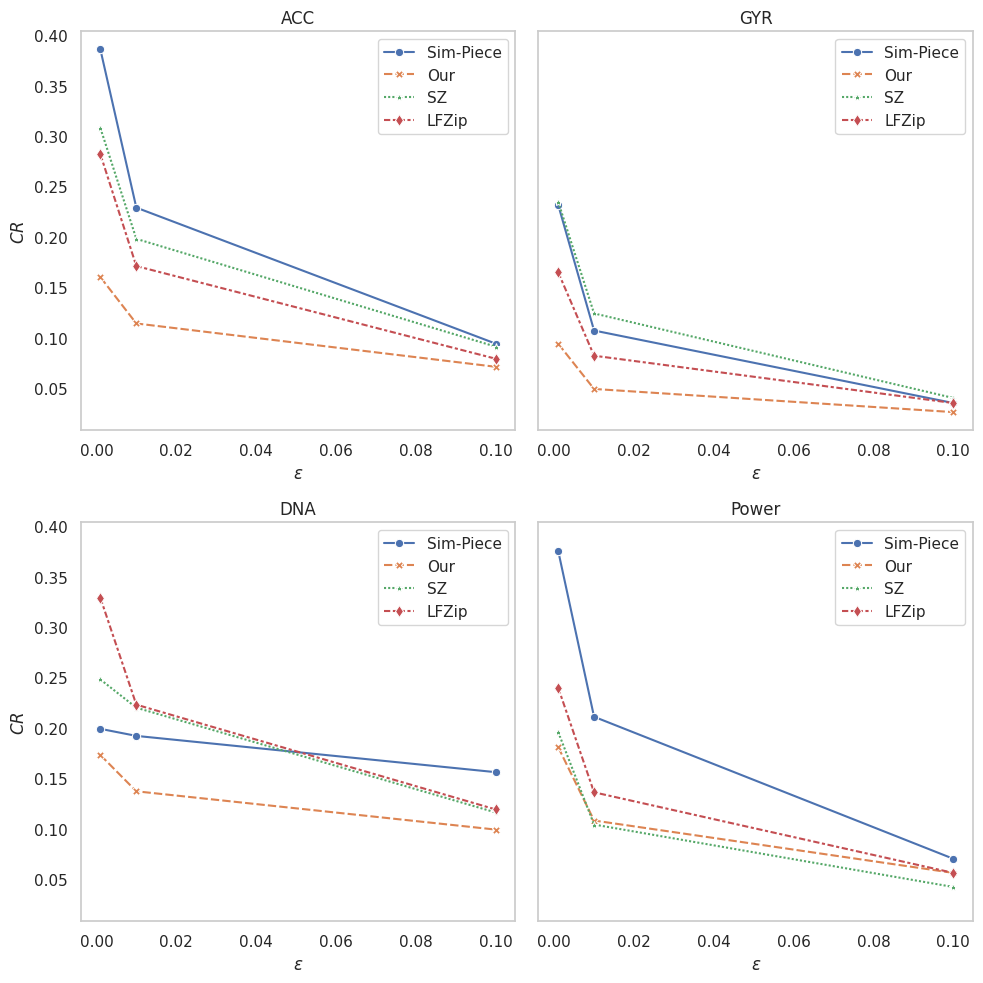

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Epsilon values and datasets
epsilon_values = [0.1, 0.01, 0.001]
datasets = ['ACC', 'GYR', 'DNA', 'Power']

# Compression ratio values for 'Sim-Piece' for each dataset
sim_piece_values = {
    'ACC': [0.094, 0.229, 0.386],
    'GYR': [0.035,  0.107, 0.232],
    'DNA': [0.156,   0.192 , 0.199],
    'Power': [0.070,   0.211 , 0.376]
}

our_values = {
    'ACC': [0.071,  0.114,  0.160],
    'GYR': [ 0.026,  0.049, 0.094],
    'DNA': [0.099,   0.137 , 0.173],
    'Power': [0.056,  0.108, 0.181]
}

SZ_values = {
    'ACC': [0.091,  0.198,  0.308],
    'GYR': [ 0.040,  0.124, 0.235],
    'DNA': [0.116,   0.220, 0.248],
    'Power': [0.042,   0.104, 0.196]
}


LFZip_values = {
    'ACC': [0.079,  0.171,  0.282],
    'GYR': [ 0.035,   0.082,  0.165],
    'DNA': [0.119,   0.223,  0.329],
    'Power': [0.056,  0.136,  0.240]
}



# Construct the DataFrame
rows = []
for dataset in datasets:
    for epsilon in epsilon_values:
        # Append 'Sim-Piece' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Sim-Piece',
            'Epsilon': epsilon,
            'Compression Ratio': sim_piece_values[dataset][epsilon_values.index(epsilon)]
        })
        # Append 'Our' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Our',
            'Epsilon': epsilon,
            'Compression Ratio': our_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'SZ' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'SZ',
            'Epsilon': epsilon,
            'Compression Ratio': SZ_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'LFZip' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'LFZip',
            'Epsilon': epsilon,
            'Compression Ratio': LFZip_values[dataset][epsilon_values.index(epsilon)]
        })

df = pd.DataFrame(rows)

# Define the plotting style
sns.set(style="whitegrid")
markers = {'Sim-Piece': 'o', 'Our': 'X', 'SZ':'*', 'LFZip':'d'}

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=False, sharey=True)
axes = axes.flatten()

# Plot each dataset
for i, dataset in enumerate(datasets):
    ax = axes[i]
    sns.lineplot(data=df[df['Dataset'] == dataset], x='Epsilon', y='Compression Ratio',
                 hue='Method',style='Method',  markers=markers, ax=ax) 
    ax.set_title(dataset)
    ax.set_xlabel(r'$\epsilon$')  # Set the name of the X-axis here
    ax.set_ylabel(r'$CR$')  # Set the name of the X-axis here
    axes[i].grid(False)  # Turn off the grid
    

# Remove extra subplots if datasets are less than 9
for j in range(i + 1,4):
    fig.delaxes(axes[j])

# Iterate through the axes to remove the legend title
for ax in fig.axes:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels)

plt.tight_layout()

# Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/entropylossy.pdf'
plt.savefig(pdf_filename, format='pdf')


plt.show()

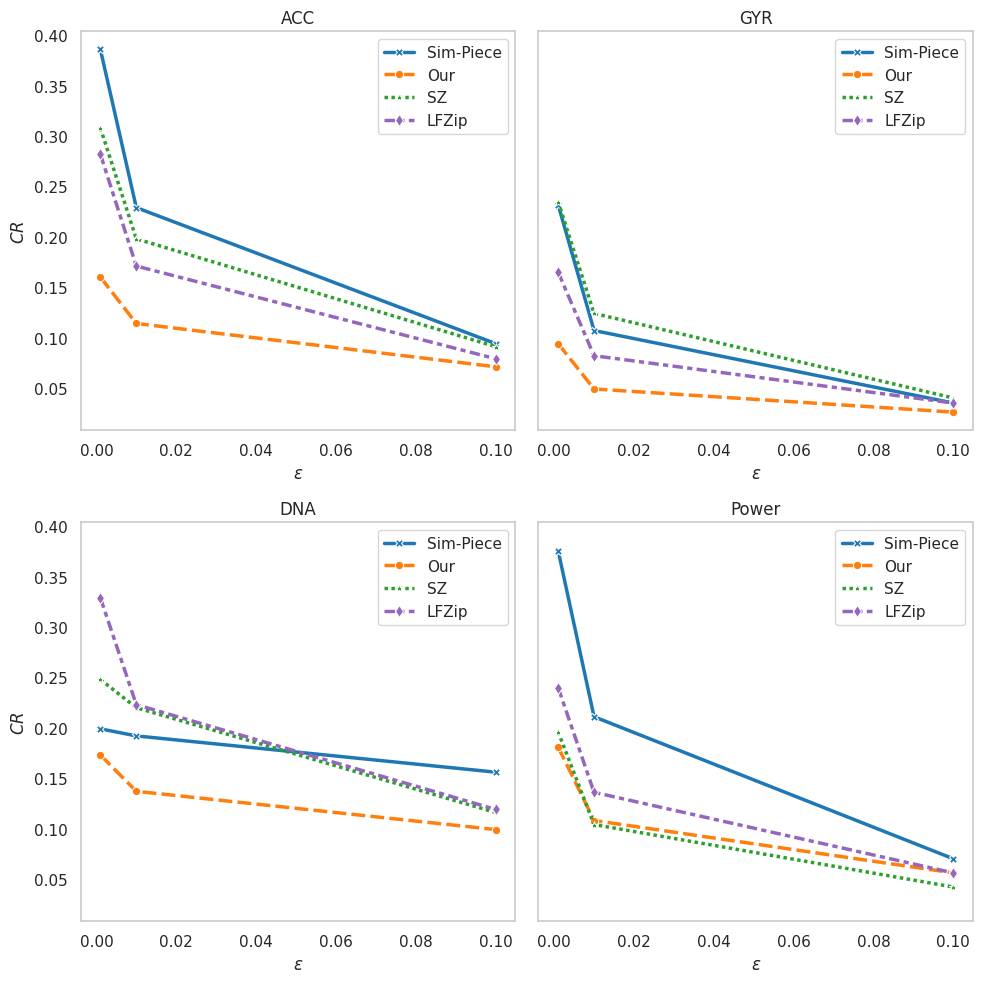

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Epsilon values and datasets
epsilon_values = [0.1, 0.01, 0.001]
datasets = ['ACC', 'GYR', 'DNA', 'Power']

# Compression ratio values for 'Sim-Piece' for each dataset
sim_piece_values = {
    'ACC': [0.094, 0.229, 0.386],
    'GYR': [0.035,  0.107, 0.232],
    'DNA': [0.156,   0.192 , 0.199],
    'Power': [0.070,   0.211 , 0.376]
}

our_values = {
    'ACC': [0.071,  0.114,  0.160],
    'GYR': [ 0.026,  0.049, 0.094],
    'DNA': [0.099,   0.137 , 0.173],
    'Power': [0.056,  0.108, 0.181]
}

SZ_values = {
    'ACC': [0.091,  0.198,  0.308],
    'GYR': [ 0.040,  0.124, 0.235],
    'DNA': [0.116,   0.220, 0.248],
    'Power': [0.042,   0.104, 0.196]
}


LFZip_values = {
    'ACC': [0.079,  0.171,  0.282],
    'GYR': [ 0.035,   0.082,  0.165],
    'DNA': [0.119,   0.223,  0.329],
    'Power': [0.056,  0.136,  0.240]
}



# Construct the DataFrame
rows = []
for dataset in datasets:
    for epsilon in epsilon_values:
        # Append 'Sim-Piece' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Sim-Piece',
            'Epsilon': epsilon,
            'Compression Ratio': sim_piece_values[dataset][epsilon_values.index(epsilon)]
        })
        # Append 'Our' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Our',
            'Epsilon': epsilon,
            'Compression Ratio': our_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'SZ' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'SZ',
            'Epsilon': epsilon,
            'Compression Ratio': SZ_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'LFZip' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'LFZip',
            'Epsilon': epsilon,
            'Compression Ratio': LFZip_values[dataset][epsilon_values.index(epsilon)]
        })

df = pd.DataFrame(rows)

# Define the plotting style
sns.set(style="whitegrid")
markers = {'Sim-Piece': 'X', 'Our': 'o', 'SZ':'*', 'LFZip':'d'}

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=False, sharey=True)
axes = axes.flatten()

# Define a color palette with distinct colors
color_palette = sns.color_palette('tab10')  # 'tab10' is a palette with 10 distinct colors

# Assign specific colors to each method
method_colors = {'Sim-Piece': color_palette[0], 'Our': color_palette[1], 'SZ': color_palette[2], 'LFZip': color_palette[4]}

# Update the lineplot call to use the specified colors and increase line width
for i, dataset in enumerate(datasets):
    ax = axes[i]
    sns.lineplot(data=df[df['Dataset'] == dataset], x='Epsilon', y='Compression Ratio',
                 hue='Method', style='Method', palette=method_colors, markers=markers,
                 linewidth=2.5, ax=ax)  # Increased line width
    ax.set_title(dataset)
    ax.set_xlabel(r'$\epsilon$')
    ax.set_ylabel(r'$CR$')
    axes[i].grid(False)
    

# Remove extra subplots if datasets are less than 9
for j in range(i + 1,4):
    fig.delaxes(axes[j])

# Iterate through the axes to remove the legend title
for ax in fig.axes:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels)

plt.tight_layout()

# Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/entropylossy.pdf'
plt.savefig(pdf_filename, format='pdf')


plt.show()

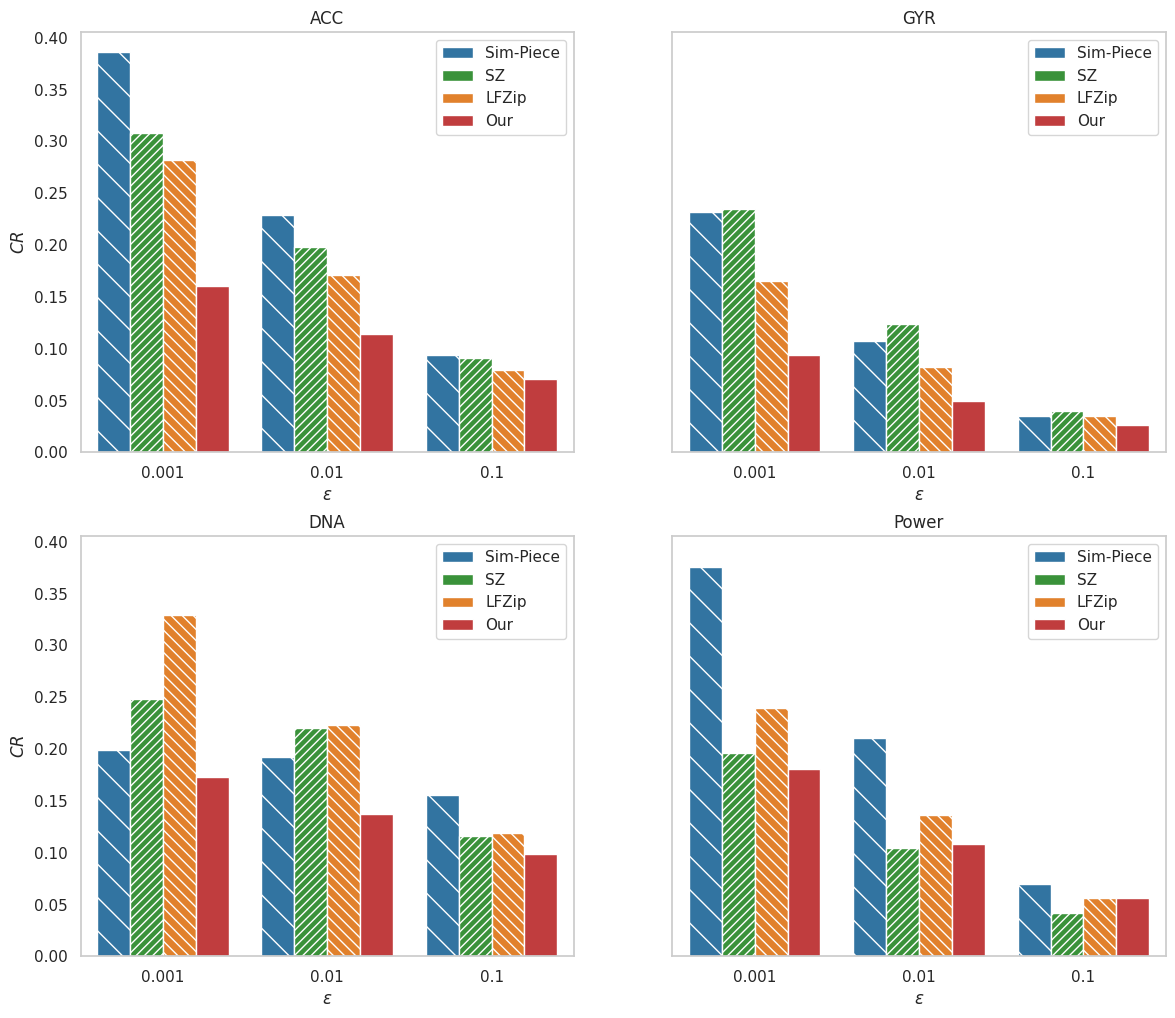

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Epsilon values and datasets
epsilon_values = [0.1, 0.01, 0.001]
datasets = ['ACC', 'GYR', 'DNA', 'Power']

# Compression ratio values for 'Sim-Piece' for each dataset
sim_piece_values = {
    'ACC': [0.094, 0.229, 0.386],
    'GYR': [0.035,  0.107, 0.232],
    'DNA': [0.156,   0.192 , 0.199],
    'Power': [0.070,   0.211 , 0.376]
}


SZ_values = {
    'ACC': [0.091,  0.198,  0.308],
    'GYR': [ 0.040,  0.124, 0.235],
    'DNA': [0.116,   0.220, 0.248],
    'Power': [0.042,   0.104, 0.196]
}


LFZip_values = {
    'ACC': [0.079,  0.171,  0.282],
    'GYR': [ 0.035,   0.082,  0.165],
    'DNA': [0.119,   0.223,  0.329],
    'Power': [0.056,  0.136,  0.240]
}

our_values = {
    'ACC': [0.071,  0.114,  0.160],
    'GYR': [ 0.026,  0.049, 0.094],
    'DNA': [0.099,   0.137 , 0.173],
    'Power': [0.056,  0.108, 0.181]
}




# Construct the DataFrame
rows = []
for dataset in datasets:
    for epsilon in epsilon_values:
        # Append 'Sim-Piece' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Sim-Piece',
            'Epsilon': epsilon,
            'Compression Ratio': sim_piece_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'SZ' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'SZ',
            'Epsilon': epsilon,
            'Compression Ratio': SZ_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'LFZip' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'LFZip',
            'Epsilon': epsilon,
            'Compression Ratio': LFZip_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'Our' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Our',
            'Epsilon': epsilon,
            'Compression Ratio': our_values[dataset][epsilon_values.index(epsilon)]
        })



# Construct the DataFrame
df = pd.DataFrame(rows)

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharex=False, sharey=True)
axes = axes.flatten()

color_palette = sns.color_palette('tab10')

method_colors = {'Sim-Piece': color_palette[0], 'SZ': color_palette[2], 'LFZip': color_palette[1], 'Our': color_palette[3]}
method_hatches = {'Sim-Piece': '\\', 'SZ': '////', 'LFZip': '\\\\\\', 'Our': None}  # Use None for no hatching

for i, dataset in enumerate(datasets):
    ax = axes[i]
    barplot = sns.barplot(data=df[df['Dataset'] == dataset], x='Epsilon', y='Compression Ratio',
                          hue='Method', palette=method_colors, ax=ax)

    # Iterate over the methods and apply hatching patterns using the hue information
    hatches = iter([method_hatches[method] for method in df['Method'].unique() if method in method_hatches])
    for bars in barplot.containers:
        hatch = next(hatches)
        for bar in bars:
            bar.set_hatch(hatch)

    ax.set_title(dataset)
    ax.set_xlabel(r'$\epsilon$')
    ax.set_ylabel(r'$CR$')
    ax.legend(title='')  # Remove legend title
    axes[i].grid(False)


# Remove extra subplots if datasets are less than 9
for j in range(i + 1, 4):
    fig.delaxes(axes[j])

# Add a legend and adjust the layout
#handles, labels = axes[0].get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.05))
#plt.tight_layout(rect=[0, 0, 1, 0.95])
    
# Iterate through the axes to remove the legend title
for ax in fig.axes:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels)

# Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/entropylossy.pdf'
plt.savefig(pdf_filename, format='pdf')

plt.show()


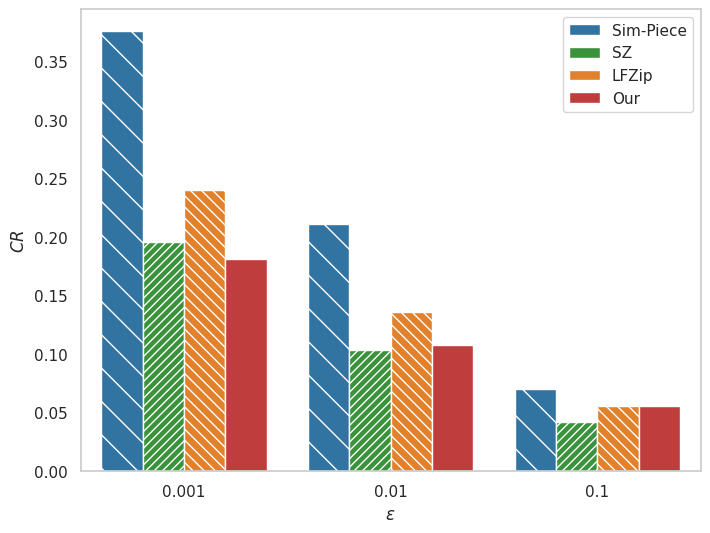

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Epsilon values and datasets
epsilon_values = [0.1, 0.01, 0.001]
datasets = ['Power']

# Compression ratio values for 'Sim-Piece' for each dataset
sim_piece_values = {
    'Power': [0.070,   0.211 , 0.376]
}

SZ_values = {
    'Power': [0.042,   0.104, 0.196]
}

LFZip_values = {
    'Power': [0.056,  0.136,  0.240]
}

our_values = {
    'Power': [0.056,  0.108, 0.181]
}

# Construct the DataFrame
rows = []
for dataset in datasets:
    for epsilon in epsilon_values:
        # Append 'Sim-Piece' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Sim-Piece',
            'Epsilon': epsilon,
            'Compression Ratio': sim_piece_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'SZ' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'SZ',
            'Epsilon': epsilon,
            'Compression Ratio': SZ_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'LFZip' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'LFZip',
            'Epsilon': epsilon,
            'Compression Ratio': LFZip_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'Our' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Our',
            'Epsilon': epsilon,
            'Compression Ratio': our_values[dataset][epsilon_values.index(epsilon)]
        })

# Construct the DataFrame
df = pd.DataFrame(rows)

sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 6))

color_palette = sns.color_palette('tab10')

method_colors = {'Sim-Piece': color_palette[0], 'SZ': color_palette[2], 'LFZip': color_palette[1], 'Our': color_palette[3]}
method_hatches = {'Sim-Piece': '\\', 'SZ': '////', 'LFZip': '\\\\\\', 'Our': None}  # Use None for no hatching

barplot = sns.barplot(data=df[df['Dataset'] == 'Power'], x='Epsilon', y='Compression Ratio',
                      hue='Method', palette=method_colors)

# Iterate over the methods and apply hatching patterns using the hue information
hatches = iter([method_hatches[method] for method in df['Method'].unique() if method in method_hatches])
for bars in barplot.containers:
    hatch = next(hatches)
    for bar in bars:
        bar.set_hatch(hatch)

#plt.title('Power')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$CR$')
plt.legend(title='', loc='upper right')
plt.grid(False)

# Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/powerCompress.pdf'
plt.savefig(pdf_filename, format='pdf')

plt.show()


### 5、size change

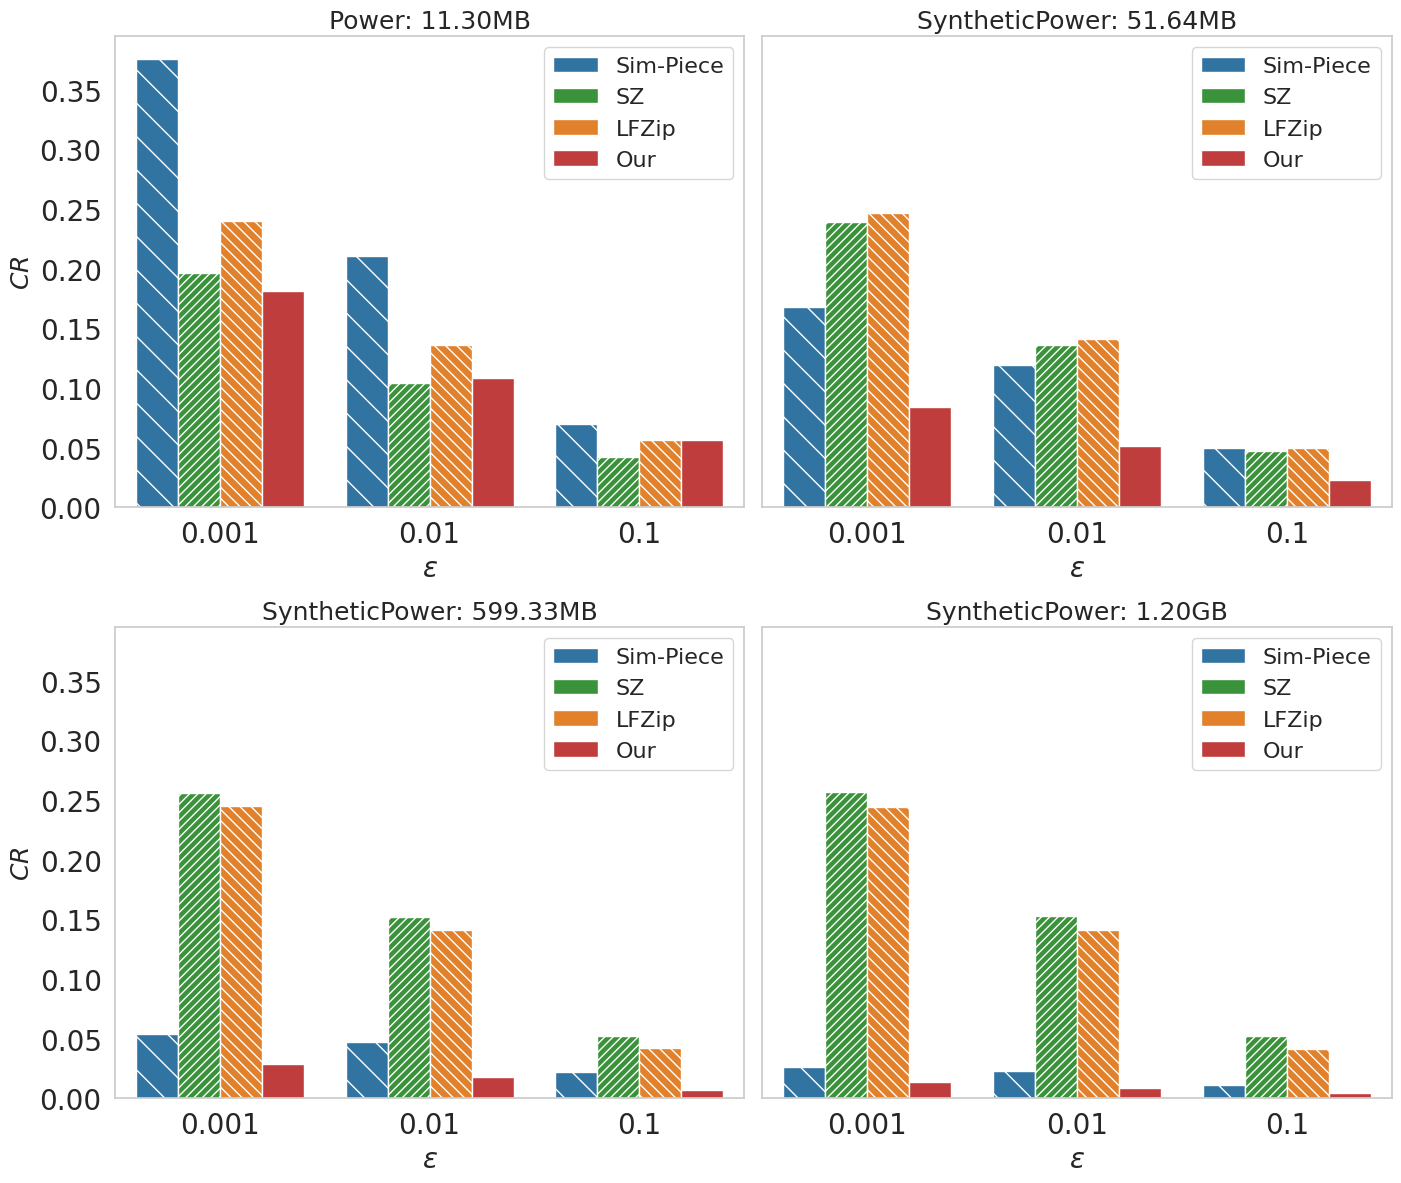

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
# Epsilon values and datasets
epsilon_values = [0.1, 0.01, 0.001]
datasets = ['Power: 11.30MB', 'SyntheticPower: 51.64MB', 'SyntheticPower: 599.33MB', 'SyntheticPower: 1.20GB']

# Compression ratio values for 'Sim-Piece' for each dataset
sim_piece_values = {
    'Power: 11.30MB': [0.070,   0.211 , 0.376],
    'SyntheticPower: 51.64MB': [0.050 , 0.119 , 0.168 ],
    'SyntheticPower: 599.33MB': [ 0.022, 0.047, 0.054],
    'SyntheticPower: 1.20GB': [ 0.011, 0.023, 0.026]
}


SZ_values = {
    'Power: 11.30MB': [0.042,   0.104, 0.196],
    'SyntheticPower: 51.64MB': [0.0468, 0.1363, 0.239	],
    'SyntheticPower: 599.33MB': [ 0.0520, 0.1517, 0.2562],
    'SyntheticPower: 1.20GB': [ 0.0518, 0.1525, 0.2569]
}


LFZip_values = {
    'Power: 11.30MB': [0.056,  0.136,  0.240],
    'SyntheticPower: 51.64MB': [0.0494, 0.1412, 0.2466],
    'SyntheticPower: 599.33MB': [ 0.0424,0.141, 0.245],
    'SyntheticPower: 1.20GB': [ 0.0417, 0.1407, 0.2444]
}

our_values = {
    'Power: 11.30MB': [0.056,  0.108, 0.181],
    'SyntheticPower: 51.64MB': [0.023, 0.051, 0.084],
    'SyntheticPower: 599.33MB': [ 0.007, 0.018, 0.029],
    'SyntheticPower: 1.20GB': [ 0.004, 0.009, 0.014]
}




# Construct the DataFrame
rows = []
for dataset in datasets:
    for epsilon in epsilon_values:
        # Append 'Sim-Piece' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Sim-Piece',
            'Epsilon': epsilon,
            'Compression Ratio': sim_piece_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'SZ' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'SZ',
            'Epsilon': epsilon,
            'Compression Ratio': SZ_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'LFZip' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'LFZip',
            'Epsilon': epsilon,
            'Compression Ratio': LFZip_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'Our' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Our',
            'Epsilon': epsilon,
            'Compression Ratio': our_values[dataset][epsilon_values.index(epsilon)]
        })



# Construct the DataFrame
df = pd.DataFrame(rows)

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 12), sharex=False, sharey=True)
axes = axes.flatten()

color_palette = sns.color_palette('tab10')

method_colors = {'Sim-Piece': color_palette[0], 'SZ': color_palette[2], 'LFZip': color_palette[1], 'Our': color_palette[3]}
method_hatches = {'Sim-Piece': '\\', 'SZ': '////', 'LFZip': '\\\\\\', 'Our': None}  # Use None for no hatching

for i, dataset in enumerate(datasets):
    ax = axes[i]
    barplot = sns.barplot(data=df[df['Dataset'] == dataset], x='Epsilon', y='Compression Ratio',
                          hue='Method', palette=method_colors, ax=ax)

    # Iterate over the methods and apply hatching patterns using the hue information
    hatches = iter([method_hatches[method] for method in df['Method'].unique() if method in method_hatches])
    for bars in barplot.containers:
        hatch = next(hatches)
        for bar in bars:
            bar.set_hatch(hatch)

    ax.set_title(dataset, fontsize=18)
    ax.set_xlabel(r'$\epsilon$', fontsize=20)
    ax.set_ylabel(r'$CR$', fontsize=18)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.legend(title='')  # Remove legend title
    axes[i].grid(False)


# Remove extra subplots if datasets are less than 9
for j in range(i + 1, 4):
    fig.delaxes(axes[j])
    
# Iterate through the axes to remove the legend title
for ax in fig.axes:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels, fontsize=16)

plt.tight_layout()

# Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/sizelossy.pdf'
plt.savefig(pdf_filename, format='pdf')

plt.show()

### 8、error variation

/tmp/ipykernel_3360000/1504070149.py:114: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.lineplot(data=df[df['Dataset'] == dataset], x='Epsilon', y='Compression Ratio',


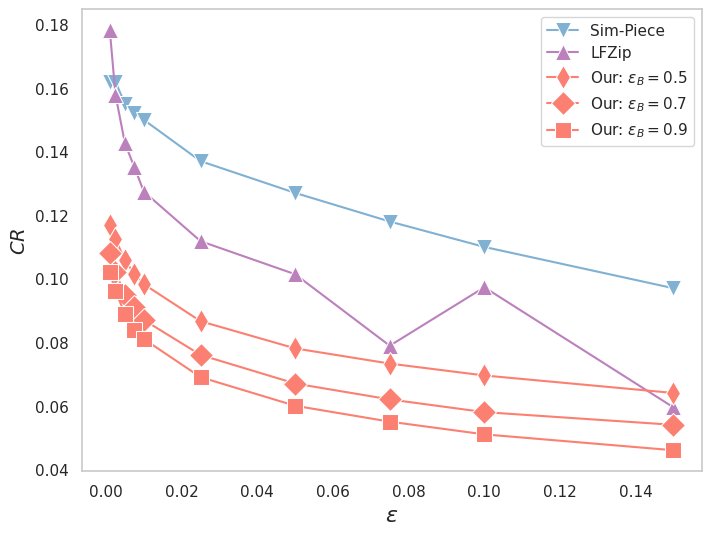

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Epsilon values and datasets
epsilon_values = [0.15, 0.1, 0.075, 0.05, 0.025, 0.01, 0.0075, 0.005, 0.0025, 0.001]
datasets = ['WindSpeed', "FaceFour"]

# Compression ratio values for 'Sim-Piece' for each dataset
sim_piece_values = {
    'WindSpeed': [0.097,0.110,0.118,0.127,0.137,0.150,0.152,0.155,0.162,0.162],
    'FaceFour':[0.058,0.073,0.084,0.099,0.123,0.146,0.153,0.164,0.180,0.204]
}

our_values = {
    'WindSpeed':[0.06403,0.06954,0.07328,0.07806,0.08661,0.09826,0.10145,0.10581, 0.11250,0.11705],
    'FaceFour':[0.03860,0.04330,0.04609,0.05066,0.05802,0.06806,0.07100,0.07544,0.08329,0.09396]
}
# our_values_6 = {
#     'WindSpeed':[0.058 ,0.063 ,0.067 ,0.072 ,0.081 ,0.092 ,0.095 ,0.100 ,0.107 ,0.112 ],
#     'FaceFour':[0.037, 0.041, 0.044, 0.049, 0.056, 0.066, 0.069, 0.074, 0.082, 0.092]
# }
our_values_7 = {
    'WindSpeed':[0.054, 0.058, 0.062, 0.067, 0.076, 0.087, 0.091, 0.095, 0.102, 0.108],
        'FaceFour':[0.036, 0.040, 0.043, 0.047, 0.055, 0.064, 0.067, 0.072, 0.080, 0.091]
}
# our_values_8 = {
#     'WindSpeed':[0.049, 0.054, 0.058, 0.063, 0.072, 0.084, 0.087, 0.092, 0.099, 0.105],
#     'FaceFour':[0.034, 0.038, 0.042, 0.046, 0.053, 0.063, 0.066, 0.071, 0.079, 0.090]
# }
our_values_9 = {
    'WindSpeed':[0.046, 0.051, 0.055, 0.060, 0.069, 0.081, 0.084, 0.089, 0.096, 0.102],
    'FaceFour':[0.033, 0.037, 0.041, 0.045, 0.052, 0.062, 0.065, 0.070, 0.078, 0.089]
}

LFZip_values = {
    'WindSpeed':[0.0595, 0.0973, 0.0789, 0.1014, 0.1118, 0.1274, 0.1351, 0.1426, 0.1579, 0.1782], 
        'FaceFour':[0.0359, 0.0416, 0.0477, 0.0574, 0.0766, 0.0918, 0.1282, 0.1105, 0.1482, 0.1766]
}

# Construct the DataFrame
rows = []
for dataset in datasets:
    for epsilon in epsilon_values:
        # Append 'Sim-Piece' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Sim-Piece',
            'Epsilon': epsilon,
            'Compression Ratio': sim_piece_values[dataset][epsilon_values.index(epsilon)]
        })
        # Append 'LFZip' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'LFZip',
            'Epsilon': epsilon,
            'Compression Ratio': LFZip_values[dataset][epsilon_values.index(epsilon)]
        })
        # Append 'Our' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Our: '+'$\epsilon_B=0.5$' ,
            'Epsilon': epsilon,
            'Compression Ratio': our_values[dataset][epsilon_values.index(epsilon)]
        })
        # rows.append({
        #     'Dataset': dataset,
        #     'Method': 'Our: '+'$\epsilon_B=0.6$',
        #     'Epsilon': epsilon,
        #     'Compression Ratio': our_values_6[dataset][epsilon_values.index(epsilon)]
        # })
        rows.append({
            'Dataset': dataset,
            'Method': 'Our: '+'$\epsilon_B=0.7$',
            'Epsilon': epsilon,
            'Compression Ratio': our_values_7[dataset][epsilon_values.index(epsilon)]
        })
        # rows.append({
        #     'Dataset': dataset,
        #     'Method': 'Our: '+'$\epsilon_B=0.8$',
        #     'Epsilon': epsilon,
        #     'Compression Ratio': our_values_8[dataset][epsilon_values.index(epsilon)]
        # })
        rows.append({
            'Dataset': dataset,
            'Method': 'Our: '+'$\epsilon_B=0.9$',
            'Epsilon': epsilon,
            'Compression Ratio': our_values_9[dataset][epsilon_values.index(epsilon)]
        })


df = pd.DataFrame(rows)

# Define the plotting style
# sns.set(style="whitegrid")
# markers = {'Sim-Piece': 'v',  'LFZip': '^', 'Our: '+'$\epsilon_B=0.5$' : 'X',
#            'Our: '+'$\epsilon_B=0.6$': 'p','Our: '+'$\epsilon_B=0.7$': 'D','Our: '+'$\epsilon_B=0.8$': 'd','Our: '+'$\epsilon_B=0.9$': 's'}

sns.set(style="whitegrid")
markers = {'Sim-Piece': 'v',  'LFZip': '^', 'Our: '+'$\epsilon_B=0.5$' : 'd',
            'Our: '+'$\epsilon_B=0.6$': 'p','Our: '+'$\epsilon_B=0.7$': 'D','Our: '+'$\epsilon_B=0.8$': 'd','Our: '+'$\epsilon_B=0.9$': 's'}


color_palette = sns.color_palette("Set3")
palette = [color_palette[4], color_palette[9], color_palette[3],
                        color_palette[3], color_palette[3], color_palette[3], color_palette[3]]

#palette = [color_palette[0], color_palette[4], color_palette[3], 
            #color_palette[3], color_palette[3], color_palette[3], color_palette[3], color_palette[3]]

# Plot 'WindSpeed' dataset
dataset = 'WindSpeed'
plt.figure(figsize=(8, 6))
sns.lineplot(data=df[df['Dataset'] == dataset], x='Epsilon', y='Compression Ratio',
             hue='Method',style='Method', dashes=False,  markers=markers, markersize=12, palette=palette) 
#plt.title(dataset)
plt.xlabel(r'$\epsilon$', fontsize=16)
plt.ylabel(r'$CR$', fontsize=14)
plt.grid(False)

# Remove the legend title
plt.legend(title=None)

#plt.tight_layout()

# Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/varerror.pdf'
plt.savefig(pdf_filename, format='pdf')

plt.show()


### Runtime

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

# 设置全局字体大小
mpl.rcParams['font.size'] = 14

# 创建一个假设的数据集，每个压缩器有一定数量的压缩比值
compressors = ['SC','OC', 'LC', 'SD','LD', 'OD']
data = pd.DataFrame({
    'Sim-piece_'+r'$C$': [5.85, 4.88, 6.21, 5.84, 3.27, 3.29, 3.73, 6.83, 15.34],
    'LFZip_'+r'$C$': [20.999, 3.745, 9.513, 8.561, 19.787, 16.896, 19.728, 25.989, 29.42],
    'Our_'+r'$C$':   [22.68,  13.29, 20.03, 17.52, 12.93,  9.64,   21.18,    22.30,  24.86],
    'Sim-piece_'+r'$D$': [7.62, 7.81, 7.57,  6.53,  5.10, 4.15, 4.48,  6.57, 11.27],
    'LFZip_'+r'$D$':  [26.686, 3.976, 10.585, 8.95, 25.903, 20.699, 26.04, 33.294, 46.123],
    'Our_'+r'$D$': [ 33.47, 20.71, 24.41, 25.21, 22.69, 20.21, 23.57, 25.60, 35.06],
})

#palette = [color_palette[6], color_palette[4], color_palette[3],color_palette[0], color_palette[2], color_palette[7]]
palette = [color_palette[4], color_palette[0], color_palette[3],color_palette[4], color_palette[0], color_palette[3]]

# 使用 seaborn 的 color_palette 函数来为箱线图设置颜色
#palette = sns.color_palette("colorblind")  # colorblind 是 seaborn 提供的一个颜色盲友好的调色板

# 创建一个字典，将相似的压缩器映射到相似的颜色


# 使用这个调色板来创建箱线图
plt.figure(figsize=(8, 6))  # 调整图表大小
plt.grid(False)
# boxplot = sns.boxplot(x='Speed', y='Compressor', data=data, palette=palette, fliersize=0, orient='h', hue='Compressor', legend=False)
boxplot = sns.boxplot(data=data, palette=palette, fliersize=2, orient='h', legend=False, whis=10)

# 设置标题和坐标轴标签
#boxplot.set_title('Average Compress/Decompress Speed', fontsize=16, pad=12)
#boxplot.set_ylabel('Method', fontsize=12)
boxplot.set_xlabel('Speed '+ r'$(MB/s)$', fontsize=12)

# 调整x轴和y轴上的字体大小
plt.tick_params(axis='x', labelsize=12)  # x轴标签字体大小
plt.tick_params(axis='y', labelsize=12)  # y轴标签字体大小

# 调整x轴标题与x轴的距离
boxplot.xaxis.labelpad = 10  # 调整距离，可以根据需要进行调整
boxplot.yaxis.labelpad = 10  # 调整距离，可以根据需要进行调整


plt.tight_layout()
# Save the plot as a PDF file
# pdf_filename = '/home/guoyou/ExtractSemantic/figure/speed.pdf'
# plt.savefig(pdf_filename, format='pdf')

# 显示图表
plt.show()




NameError: name 'color_palette' is not defined

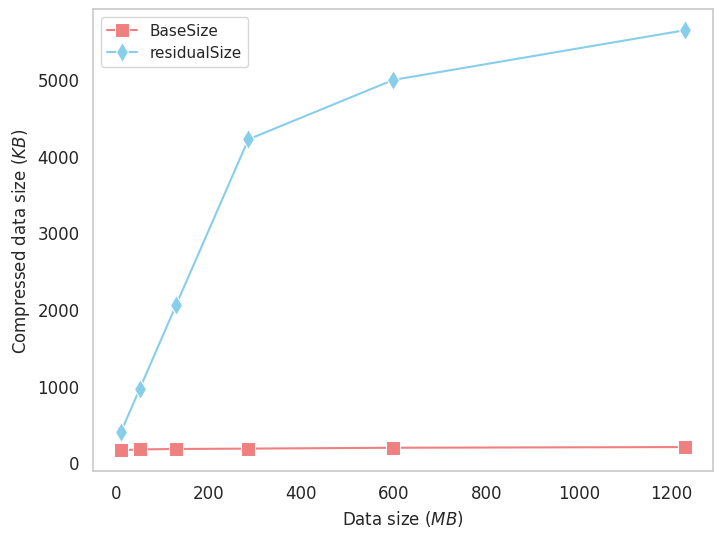

In [14]:
# 重新运行代码块之前需要重新导入所有必要的库
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

# 设置全局字体大小
mpl.rcParams['font.size'] = 14

# 创建模拟数据来匹配图像中的趋势。
time_hours = np.array([11.30, 51.64, 129.88, 286.37, 599.33, 1.20*1024])
#time_hours = np.array([0,1,2,3,4,5])
BaseSize = np.array([161.618,  172.632, 178.101,  183.121,   194.211, 203.306])
residualSize = np.array([403.707,  963.297,  2050.910, 4216.141, 4990.914, 5638.724])

# 创建 DataFrame
data = pd.DataFrame({
    'Time (h)': np.concatenate([time_hours, time_hours]),
    'Concentration (mM)': np.concatenate([BaseSize, residualSize]),
    'Substance': ['BaseSize'] * len(time_hours) + ['residualSize'] * len(time_hours)
})

# 使用 seaborn 创建线性图
plt.figure(figsize=(8,6))
lineplot = sns.lineplot(data=data, x='Time (h)', y='Concentration (mM)', hue='Substance', style='Substance',
                        markers=['s','d'], dashes=False, markersize=10, palette=['lightcoral', 'skyblue' ])


# 设置图例
lineplot.legend(title='')

# 设置标题和坐标轴标签
#plt.title('')
plt.xlabel('Data size '+ r'$(MB)$',fontsize=12)
plt.ylabel('Compressed data size '+ r'$(KB)$', fontsize=12)
plt.grid(False)

# 调整x轴和y轴上的字体大小
plt.tick_params(axis='x', labelsize=12)  # x轴标签字体大小
plt.tick_params(axis='y', labelsize=12)  # y轴标签字体大小

#plt.tight_layout()


# Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/BaseChange.pdf'
plt.savefig(pdf_filename, format='pdf')

# 显示图表
plt.show()


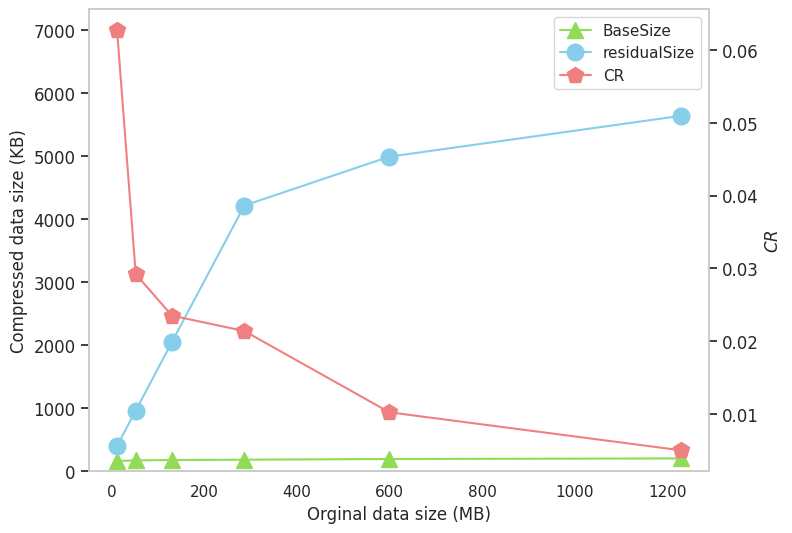

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Reusing the provided data
time_hours = np.array([11.30, 51.64, 129.88, 286.37, 599.33, 1.20*1024])
BaseSize = np.array([161.618,  172.632, 178.101,  183.121,   194.211, 203.306])
residualSize = np.array([403.707,  963.297,  2050.910, 4216.141, 4990.914, 5638.724])

# Let's assume the original size is a linear increment from 1000 MB to 6000 MB
originalSize_MB = np.linspace(1000, 6000, num=len(time_hours))

# Compression Ratio for residualSize
CR_residualSize = [0.06271, 0.02920, 0.02350, 0.02138, 0.01022, 0.00500  ]# Convert MB to KB for CR calculation

# Now, we add the second y-axis to the existing plot
fig, ax1 = plt.subplots(figsize=(8,6))

# Plotting the original data on the first y-axis
ax1.set_xlabel('Orginal data size (MB)', fontsize=12)
ax1.set_ylabel('Compressed data size (KB)', fontsize=12)
ln1 = ax1.plot(time_hours, BaseSize, '^-', color=color_palette[2], markersize=12, label='BaseSize')
ln2 = ax1.plot(time_hours, residualSize, 'o-', color='skyblue', markersize=12, label='residualSize')
ax1.tick_params(axis='y', labelsize=12)


# Increasing y-axis limit
ax1.set_ylim(0, max(residualSize) * 1.3)

color_palette = sns.color_palette("hls", 8)
# Adding the second y-axis for the Compression Ratio
ax2 = ax1.twinx()  
ax2.set_ylabel(r'$CR$', fontsize=12) 
ln3 = ax2.plot(time_hours, CR_residualSize, 'p-', color='lightcoral', markersize=12, label='CR')
ax2.tick_params(axis='y', labelsize=12)

# Combining the legends from both axes
lns = ln1+ln2+ln3
labs = [l.get_label() for l in lns]
leg = ax1.legend(lns, labs, loc='upper right')
# Displaying the plot
# Remove the grid
ax1.grid(False)
ax2.grid(False)

# Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/BaseChange.pdf'
plt.savefig(pdf_filename, format='pdf')
plt.show()


### More compress

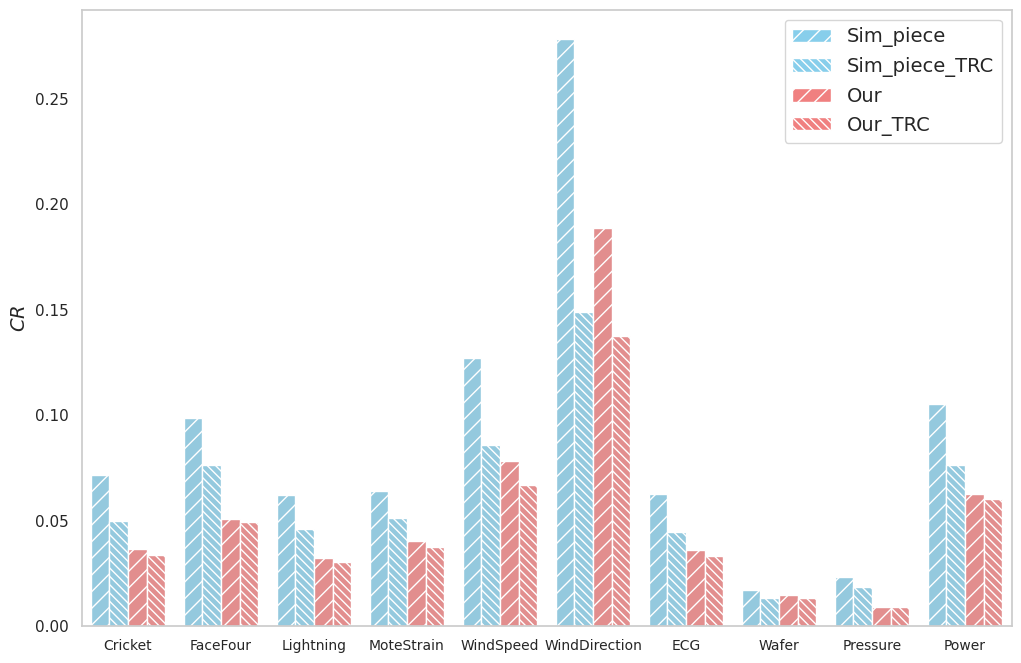

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

datasets = ["Cricket", "FaceFour", "Lightning", "MoteStrain", "WindSpeed", "WindDirection", "ECG", "Wafer", "Pressure", "Power"]
methods = ["Sim_piece", "Sim_piece_TRC", "Our", "Our_TRC"]

# Define compression ratio values for each dataset and method
compression_ratios = {
    "Cricket": {"Sim_piece": 0.07173, "Sim_piece_TRC": 0.04989, "Our": 0.03651, "Our_TRC": 0.03377},
    "FaceFour": {"Sim_piece": 0.09847, "Sim_piece_TRC": 0.0764, "Our": 0.05064, "Our_TRC": 0.04914},
    "Lightning": {"Sim_piece": 0.06184, "Sim_piece_TRC": 0.046, "Our": 0.03206, "Our_TRC": 0.03047},
    "MoteStrain": {"Sim_piece": 0.06419, "Sim_piece_TRC": 0.05108, "Our": 0.04022, "Our_TRC": 0.0373},
    "WindSpeed": {"Sim_piece": 0.12683, "Sim_piece_TRC": 0.0856, "Our": 0.07812, "Our_TRC": 0.06696},
    "WindDirection": {"Sim_piece": 0.27835, "Sim_piece_TRC": 0.1487, "Our": 0.18879, "Our_TRC": 0.1374},
    "ECG": {"Sim_piece": 0.06237, "Sim_piece_TRC": 0.04428, "Our": 0.03588, "Our_TRC": 0.0329},
    "Wafer": {"Sim_piece": 0.01701, "Sim_piece_TRC": 0.013, "Our": 0.01480, "Our_TRC": 0.013},
    "Pressure": {"Sim_piece": 0.02301, "Sim_piece_TRC": 0.0186, "Our": 0.00895, "Our_TRC": 0.008897},
    "Power": {"Sim_piece": 0.10539, "Sim_piece_TRC": 0.07636, "Our": 0.06271, "Our_TRC": 0.0602}
}

# Define hatching patterns for each method
method_hatches = {
    "Sim_piece": "//",
    "Sim_piece_TRC": "\\\\\\\\",
    "Our": "//",
    "Our_TRC": "\\\\\\\\"
}

# Construct the DataFrame
rows = []
for dataset in datasets:
    for method in methods:
        rows.append({
            'Dataset': dataset,
            'Method': method,
            'Compression Ratio': compression_ratios[dataset][method]
        })

df = pd.DataFrame(rows)

sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))

color_palette = sns.color_palette('Set2')
palette=['lightcoral', 'skyblue' ]
#method_colors = {'Sim_piece': color_palette[0], 'Sim_piece_TRC': color_palette[0], 'Our': color_palette[3], 'Our_TRC': color_palette[3]}
method_colors = { 'Sim_piece': 'skyblue', 'Sim_piece_TRC': 'skyblue', 'Our': 'lightcoral', 'Our_TRC': 'lightcoral'}

barplot = sns.barplot(data=df, x='Dataset', y='Compression Ratio', hue='Method', palette=method_colors)

# Create custom legend with hatch patterns and colors
legend_elements = [
    Patch(facecolor=method_colors[method], edgecolor=None, hatch=method_hatches[method], label=f'{method}')
    for method in methods
]

plt.legend(handles=legend_elements, loc='upper right', fontsize=14)

# Iterate over the methods and apply hatching patterns using the hue information
hatches = iter([method_hatches[method] for method in methods if method in method_hatches])
for bars in barplot.containers:
    hatch = next(hatches)
    for bar in bars:
        bar.set_hatch(hatch)

plt.xlabel('')
plt.ylabel(r'$CR$', fontsize=14)
plt.grid(False)

# Rotate x-axis labels for better readability
plt.xticks(ha='center')
plt.tick_params(axis='x', labelsize=10)  # x轴标签字体大小

# Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/morecompress.pdf'
plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')

plt.show()


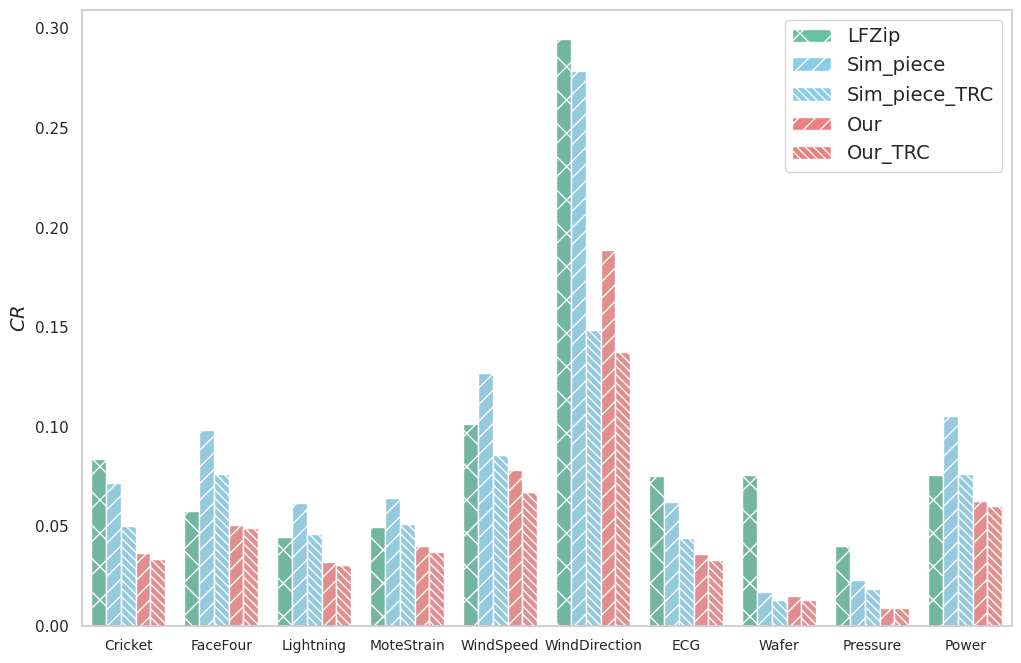

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

datasets = ["Cricket", "FaceFour", "Lightning", "MoteStrain", "WindSpeed", "WindDirection", "ECG", "Wafer", "Pressure", "Power"]
methods = ["LFZip", "Sim_piece", "Sim_piece_TRC", "Our", "Our_TRC"]

# Define compression ratio values for each dataset and method
compression_ratios = {
    "Cricket": {"LFZip": 0.0839,"Sim_piece": 0.07173, "Sim_piece_TRC": 0.04989, "Our": 0.03651, "Our_TRC": 0.03377},
    "FaceFour": {"LFZip": 0.0574,"Sim_piece": 0.09847, "Sim_piece_TRC": 0.0764, "Our": 0.05064, "Our_TRC": 0.04914},
    "Lightning": {"LFZip":  0.0444,"Sim_piece": 0.06184, "Sim_piece_TRC": 0.046, "Our": 0.03206, "Our_TRC": 0.03047},
    "MoteStrain": {"LFZip":  0.0494,"Sim_piece": 0.06419, "Sim_piece_TRC": 0.05108, "Our": 0.04022, "Our_TRC": 0.0373},
    "WindSpeed": {"LFZip":   0.1014, "Sim_piece": 0.12683, "Sim_piece_TRC": 0.0856, "Our": 0.07812, "Our_TRC": 0.06696},
    "WindDirection": {"LFZip":   0.2945,"Sim_piece": 0.27835, "Sim_piece_TRC": 0.1487, "Our": 0.18879, "Our_TRC": 0.1374},
    "ECG": {"LFZip": 0.0751,"Sim_piece": 0.06237, "Sim_piece_TRC": 0.04428, "Our": 0.03588, "Our_TRC": 0.0329},
    "Wafer": {"LFZip": 0.0759,"Sim_piece": 0.01701, "Sim_piece_TRC": 0.013, "Our": 0.01480, "Our_TRC": 0.013},
    "Pressure": {"LFZip": 0.0403,"Sim_piece": 0.02301, "Sim_piece_TRC": 0.0186, "Our": 0.00895, "Our_TRC": 0.008897},
    "Power": {"LFZip": 0.0755,"Sim_piece": 0.10539, "Sim_piece_TRC": 0.07636, "Our": 0.06271, "Our_TRC": 0.0602}
}

# Define hatching patterns for each method
method_hatches = {
    "LFZip": "X",
    "Sim_piece": "//",
    "Sim_piece_TRC": "\\\\\\\\",
    "Our": "//",
    "Our_TRC": "\\\\\\\\"
}

# Construct the DataFrame
rows = []
for dataset in datasets:
    for method in methods:
        rows.append({
            'Dataset': dataset,
            'Method': method,
            'Compression Ratio': compression_ratios[dataset][method]
        })

df = pd.DataFrame(rows)

sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))

color_palette = sns.color_palette('Set2')
palette=['lightcoral', 'skyblue' ]
color_palette2 = sns.color_palette('tab10')
#method_colors = {'Sim_piece': color_palette[0], 'Sim_piece_TRC': color_palette[0], 'Our': color_palette[3], 'Our_TRC': color_palette[3]}
method_colors = {'LFZip':color_palette[0], 'Sim_piece': 'skyblue', 'Sim_piece_TRC': 'skyblue', 'Our': 'lightcoral', 'Our_TRC': 'lightcoral'}

barplot = sns.barplot(data=df, x='Dataset', y='Compression Ratio', hue='Method', palette=method_colors)

# Create custom legend with hatch patterns and colors
legend_elements = [
    Patch(facecolor=method_colors[method], edgecolor=None, hatch=method_hatches[method], label=f'{method}')
    for method in methods
]

plt.legend(handles=legend_elements, loc='upper right', fontsize=14)

# Iterate over the methods and apply hatching patterns using the hue information
hatches = iter([method_hatches[method] for method in methods if method in method_hatches])
for bars in barplot.containers:
    hatch = next(hatches)
    for bar in bars:
        bar.set_hatch(hatch)

plt.xlabel('')
plt.ylabel(r'$CR$', fontsize=14)
plt.grid(False)

# Rotate x-axis labels for better readability
plt.xticks(ha='center')
plt.tick_params(axis='x', labelsize=10)  # x轴标签字体大小

# Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/morecompress.pdf'
plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')

plt.show()


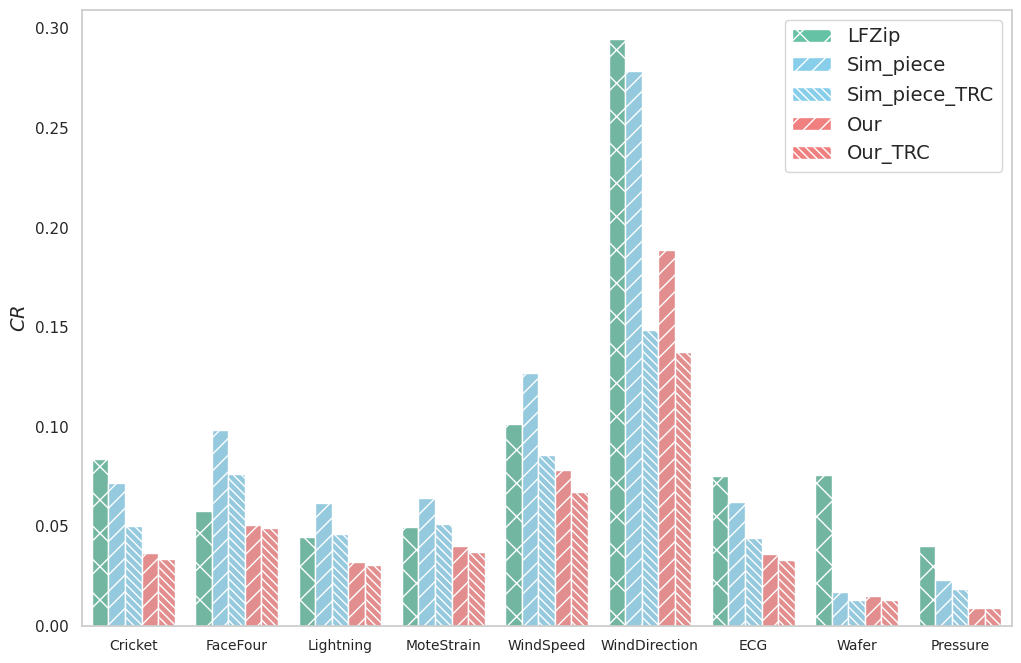

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

datasets = ["Cricket", "FaceFour", "Lightning", "MoteStrain", "WindSpeed", "WindDirection", "ECG", "Wafer", "Pressure"]
methods = ["LFZip", "Sim_piece", "Sim_piece_TRC", "Our", "Our_TRC"]

# Define compression ratio values for each dataset and method
compression_ratios = {
    "Cricket": {"LFZip": 0.0839,"Sim_piece": 0.07173, "Sim_piece_TRC": 0.04989, "Our": 0.03651, "Our_TRC": 0.03377},
    "FaceFour": {"LFZip": 0.0574,"Sim_piece": 0.09847, "Sim_piece_TRC": 0.0764, "Our": 0.05064, "Our_TRC": 0.04914},
    "Lightning": {"LFZip":  0.0444,"Sim_piece": 0.06184, "Sim_piece_TRC": 0.046, "Our": 0.03206, "Our_TRC": 0.03047},
    "MoteStrain": {"LFZip":  0.0494,"Sim_piece": 0.06419, "Sim_piece_TRC": 0.05108, "Our": 0.04022, "Our_TRC": 0.0373},
    "WindSpeed": {"LFZip":   0.1014, "Sim_piece": 0.12683, "Sim_piece_TRC": 0.0856, "Our": 0.07812, "Our_TRC": 0.06696},
    "WindDirection": {"LFZip":   0.2945,"Sim_piece": 0.27835, "Sim_piece_TRC": 0.1487, "Our": 0.18879, "Our_TRC": 0.1374},
    "ECG": {"LFZip": 0.0751,"Sim_piece": 0.06237, "Sim_piece_TRC": 0.04428, "Our": 0.03588, "Our_TRC": 0.0329},
    "Wafer": {"LFZip": 0.0759,"Sim_piece": 0.01701, "Sim_piece_TRC": 0.013, "Our": 0.01480, "Our_TRC": 0.013},
    "Pressure": {"LFZip": 0.0403,"Sim_piece": 0.02301, "Sim_piece_TRC": 0.0186, "Our": 0.00895, "Our_TRC": 0.008897}
}

# Define hatching patterns for each method
method_hatches = {
    "LFZip": "X",
    "Sim_piece": "//",
    "Sim_piece_TRC": "\\\\\\\\",
    "Our": "//",
    "Our_TRC": "\\\\\\\\"
}

# Construct the DataFrame
rows = []
for dataset in datasets:
    for method in methods:
        rows.append({
            'Dataset': dataset,
            'Method': method,
            'Compression Ratio': compression_ratios[dataset][method]
        })

df = pd.DataFrame(rows)

sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))

color_palette = sns.color_palette('Set2')
palette=['lightcoral', 'skyblue' ]
color_palette2 = sns.color_palette('tab10')
#method_colors = {'Sim_piece': color_palette[0], 'Sim_piece_TRC': color_palette[0], 'Our': color_palette[3], 'Our_TRC': color_palette[3]}
method_colors = {'LFZip':color_palette[0], 'Sim_piece': 'skyblue', 'Sim_piece_TRC': 'skyblue', 'Our': 'lightcoral', 'Our_TRC': 'lightcoral'}

barplot = sns.barplot(data=df, x='Dataset', y='Compression Ratio', hue='Method', palette=method_colors)

# Create custom legend with hatch patterns and colors
legend_elements = [
    Patch(facecolor=method_colors[method], edgecolor=None, hatch=method_hatches[method], label=f'{method}')
    for method in methods
]

plt.legend(handles=legend_elements, loc='upper right', fontsize=14)

# Iterate over the methods and apply hatching patterns using the hue information
hatches = iter([method_hatches[method] for method in methods if method in method_hatches])
for bars in barplot.containers:
    hatch = next(hatches)
    for bar in bars:
        bar.set_hatch(hatch)

plt.xlabel('')
plt.ylabel(r'$CR$', fontsize=14)
plt.grid(False)

# Rotate x-axis labels for better readability
plt.xticks(ha='center')
plt.tick_params(axis='x', labelsize=10)  # x轴标签字体大小

# Save the plot as a PDF file
pdf_filename = '/home/guoyou/ExtractSemantic/figure/morecompress.pdf'
plt.savefig(pdf_filename, format='pdf', bbox_inches='tight')

plt.show()


### Compare HIER

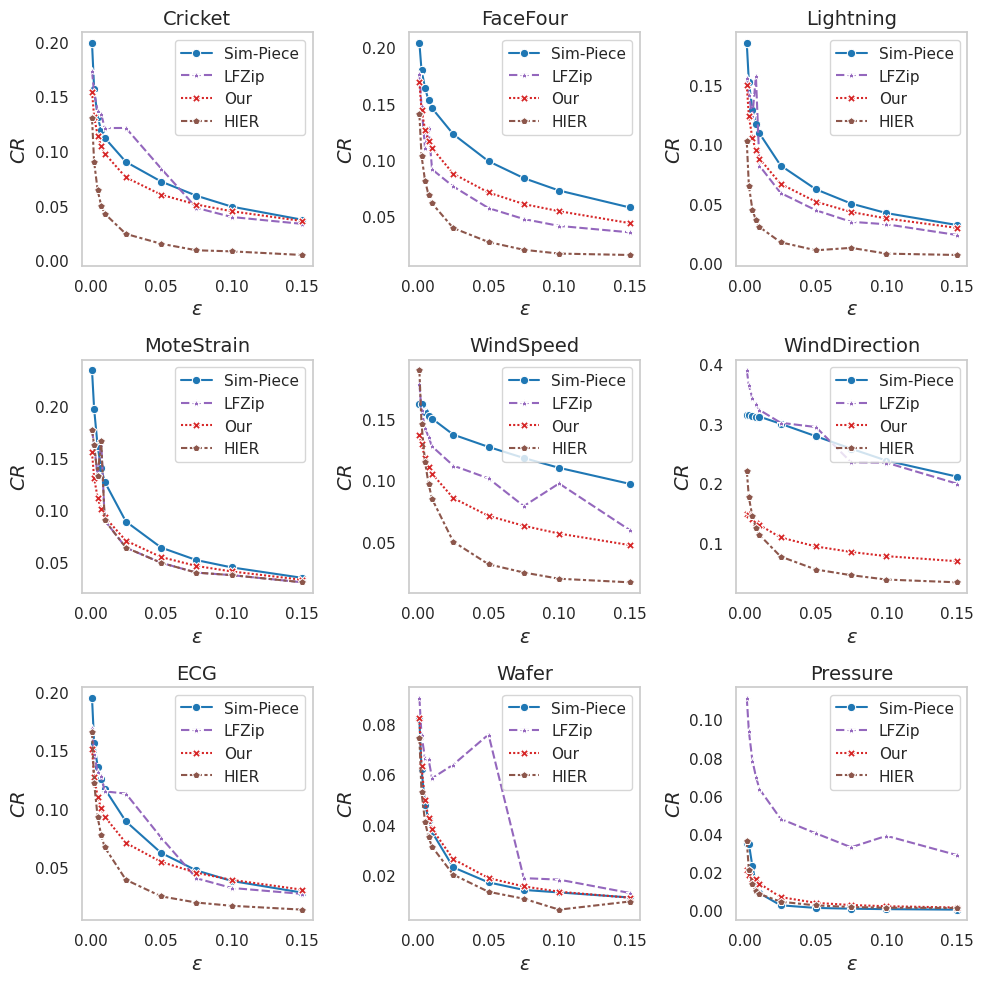

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Epsilon values and datasets
epsilon_values = [0.15, 0.1, 0.075, 0.05, 0.025, 0.01, 0.0075, 0.005, 0.0025, 0.001]
datasets = ['Cricket', 'FaceFour', 'Lightning', 'MoteStrain',  'WindSpeed', 'WindDirection', 'ECG', 'Wafer','Pressure']

# Compression ratio values for 'Sim-Piece' for each dataset
sim_piece_values = {
    'Cricket': [0.037, 0.049, 0.059, 0.072, 0.090, 0.112, 0.119, 0.131, 0.157, 0.199],
    'FaceFour':[0.058,0.073,0.084,0.099,0.123,0.146,0.153,0.164,0.180,0.204],
    'Lightning': [0.032,0.042,0.050,0.062,0.082,0.109,0.117,0.129,0.152,0.185],
    'MoteStrain': [0.035,0.045,0.052,0.064,0.089,0.127,0.140,0.161,0.197,0.234],
    'WindSpeed': [0.097,0.110,0.118,0.127,0.137,0.150,0.152,0.155,0.162,0.162],
    'WindDirection': [0.211,0.238,0.258,0.279,0.300,0.312,0.312,0.313,0.314,0.314],
    'ECG': [0.028, 0.038, 0.047, 0.062, 0.089, 0.117, 0.125, 0.136, 0.156, 0.195,],
    'Wafer': [0.011,0.013,0.014,0.017,0.023,0.037,0.042,0.048,0.062,0.082],
    'Pressure': [0.00034,0.00060,0.00084,0.00124,0.00262,0.00896,0.01361,0.02301,0.03486,0.03517]
}

our_values = {
    'Cricket': [0.03580 ,0.04477,0.05093, 0.05995,0.07579,0.09768,0.10450,0.11415,0.13131,0.15414 ],
    'FaceFour':[0.04408,0.05466,0.06098,0.07125,0.08790,0.11051,0.11716,0.12716,0.14491,0.16902],
    'Lightning':[0.02957,0.03751,0.04294,0.05156,0.06652,0.08783,0.09461,0.10478,0.12329,0.14950],
    'MoteStrain':[0.03311,0.04112,0.04636,0.05490,0.07064,0.09341,0.10071,0.11168,0.13076,0.15533],
    'WindSpeed':[0.04721,0.05656,0.06287,0.07095,0.08544,0.10515,0.11055,0.11793,0.12925,0.13697],
    'WindDirection':[0.06852,0.07708,0.08411,0.09337,0.10850,0.12950,0.13364,0.13960,0.14668,0.14802],
    'ECG': [0.03050 ,0.03893 ,0.04498 ,0.05429 ,0.07057 ,0.09309 ,0.10012 ,0.10990 ,0.12741 ,0.15092 ],
    'Wafer':[0.01089 ,0.01330 ,0.01539 ,0.01873 ,0.02626 ,0.03828 ,0.04278 ,0.04969 ,0.06325 ,0.08229],
    'Pressure':[0.00146 ,0.00213 ,0.00276 ,0.00389 ,0.00691 ,0.01399 ,0.01635 ,0.01640 ,0.01869 ,0.02110 ]
}

LFZip_values = {
    'Cricket': [ 0.0332,0.0395	,0.0479, 0.0839,0.1211, 0.121,0.134,0.1366,0.153,0.1733],
    'FaceFour':[ 0.0359	,0.0416	,0.0477	, 0.0574	,0.0766	, 0.0918	,0.1282	,0.1105	,0.1482	,0.1766	],
    'Lightning':[ 0.0236,0.0326	,0.0347, 0.0444,0.0589, 0.0818,0.157,0.1237,0.141,0.1553],
    'MoteStrain':[ 0.0307	,0.0376	,0.04	, 0.0494	,0.064	, 0.0901	,0.1664	,0.1325	,0.1621	,0.177	],
    'WindSpeed':[ 0.0595,0.0973	, 0.0789, 0.1014, 0.1118, 0.1274, 0.135, 0.1426, 0.157, 0.1782],
    'WindDirection':[0.1991,0.2345,0.2351,0.2945,0.3017,0.3233,0.3338,0.3429,0.3649,0.3901],
    'ECG': [ 0.0269,0.032,0.0403, 0.0751,0.1128, 0.1147,0.128,0.131,0.147,0.1688],
    'Wafer':[0.0128, 0.0181, 0.0187, 0.0759, 0.0639, 0.0585, 0.066, 0.0664, 0.0758, 0.0906],
    'Pressure':[0.0289, 0.039, 0.033, 0.0403, 0.0479, 0.0635, 0.07, 0.0784, 0.0937, 0.1114]
}

HIER_values = {
    'Cricket': [ 0.0047,0.00802,  0.009, 0.0150,  0.024, 0.0426,  0.05,  0.064,  0.09,  0.130],
    'FaceFour':[  0.01579,0.017028,  0.0204, 0.02729,  0.0397, 0.06154,  0.069,  0.0818,  0.104,  0.1408],
    'Lightning':[  0.00681,0.007938,  0.0128, 0.01075,  0.0175, 0.03033,  0.036,  0.0449,  0.065,  0.1023],
    'MoteStrain':[ 0.0307	,0.0376	,0.04	, 0.0494	,0.064	, 0.0901	,0.1664	,0.1325	,0.1621	,0.177	],####删除
    'WindSpeed':[  0.01694,0.019849,  0.0249, 0.03160,  0.0500, 0.08469,  0.097,  0.1147,  0.146,  0.1893],
    'WindDirection':[ 0.03301,0.037662,  0.0450, 0.05453,  0.0764, 0.11279,  0.125,  0.1439,  0.176,  0.2212],
    'ECG': [ 0.01342,0.016727,  0.0195, 0.02480,  0.0390, 0.06687,0.077,  0.0926,0.122,  0.1657],
    'Wafer':[ 0.00938,0.006145,  0.0105, 0.01325,  0.0201, 0.03117,  0.035,  0.0412,  0.053,  0.0746],
    'Pressure':[ 0.00120,0.001369,  0.0017, 0.00257,  0.0045, 0.00857,0.010,  0.0138,0.021,  0.0365]
}

# Construct the DataFrame
rows = []
for dataset in datasets:
    for epsilon in epsilon_values:
        # Append 'Sim-Piece' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Sim-Piece',
            'Epsilon': epsilon,
            'Compression Ratio': sim_piece_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'LFZip' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'LFZip',
            'Epsilon': epsilon,
            'Compression Ratio': LFZip_values[dataset][epsilon_values.index(epsilon)]
        })
        # Append 'Our' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Our',
            'Epsilon': epsilon,
            'Compression Ratio': our_values[dataset][epsilon_values.index(epsilon)]
        })
        # Append 'HIER' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'HIER',
            'Epsilon': epsilon,
            'Compression Ratio': HIER_values[dataset][epsilon_values.index(epsilon)]
        })

df = pd.DataFrame(rows)

# Define the plotting style
sns.set(style="whitegrid")
markers = {'Sim-Piece': 'o', 'LFZip': '*', 'Our': 'X', "HIER":'p'}

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=False, sharey=False)
axes = axes.flatten()

color_palette = sns.color_palette('tab10')
palette = [color_palette[0], color_palette[4], color_palette[3], color_palette[5]]

# Plot each dataset
for i, dataset in enumerate(datasets):
    ax = axes[i]
    sns.lineplot(data=df[df['Dataset'] == dataset], x='Epsilon', y='Compression Ratio',
                 hue='Method',style='Method',  markers=markers, ax=ax, palette=palette) 
    ax.set_title(dataset, fontsize=14)
    ax.set_xlabel(r'$\epsilon$', fontsize=14)  # Set the name of the X-axis here
    ax.set_ylabel(r'$CR$', fontsize=14)  # Set the name of the X-axis here
    axes[i].grid(False)  # Turn off the grid
    

# Remove extra subplots if datasets are less than 9
for j in range(i + 1, 9):
    fig.delaxes(axes[j])

# Iterate through the axes to remove the legend title
for ax in fig.axes:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels)

plt.tight_layout()

# Save the plot as a PDF file
# pdf_filename = '/home/guoyou/ExtractSemantic/figure/crlossy.pdf'
# plt.savefig(pdf_filename, format='pdf')


plt.show()

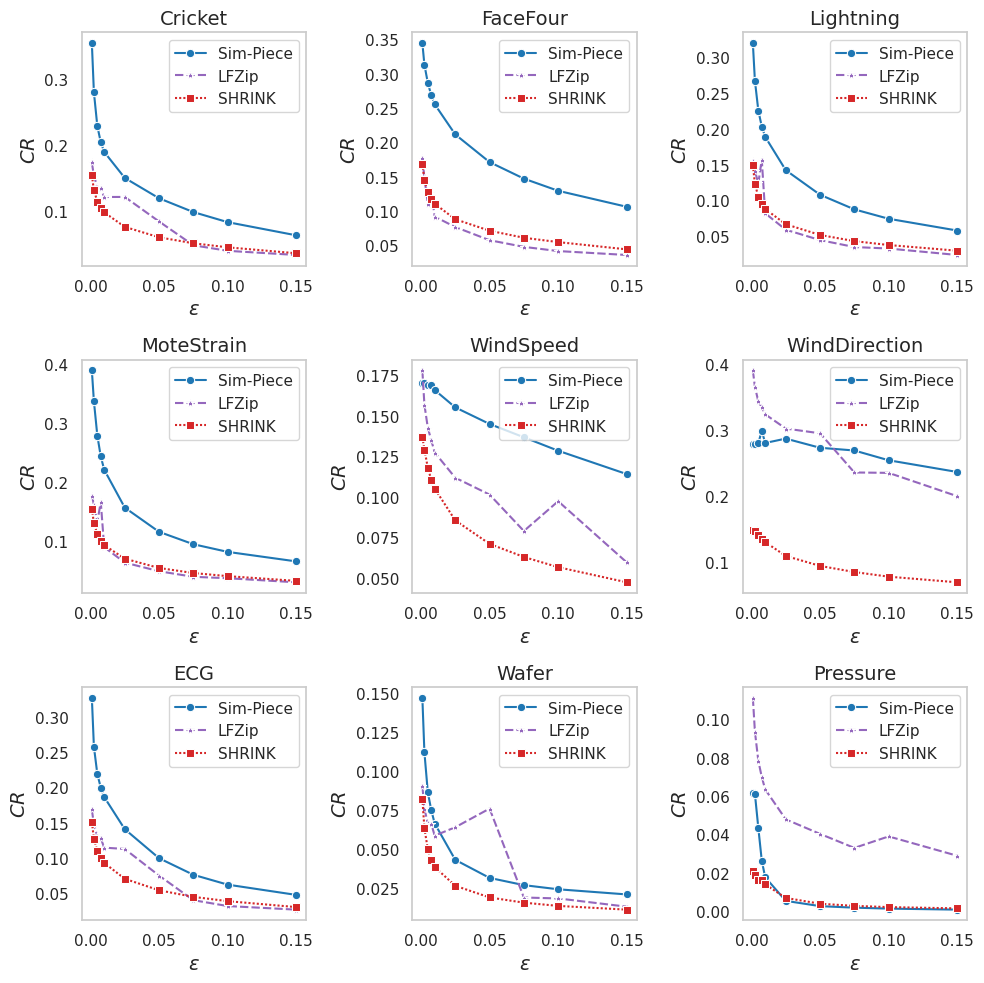

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Epsilon values and datasets
epsilon_values = [0.15, 0.1, 0.075, 0.05, 0.025, 0.01, 0.0075, 0.005, 0.0025, 0.001]
datasets = ['Cricket', 'FaceFour', 'Lightning', 'MoteStrain',  'WindSpeed', 'WindDirection', 'ECG', 'Wafer','Pressure']

# # Compression ratio values for 'Sim-Piece' for each dataset
sim_piece_values = {
    'Cricket': [0.06296,0.08290,0.09816,0.11904,0.14985,0.18924,0.20393,0.22827,0.27958,0.35429],
    'FaceFour':[0.10608,0.12937,0.14710,0.17117,0.21139,0.25538,0.26849,0.28651,0.31298,0.34472],
    'Lightning': [0.05774,0.07420,0.08734,0.10774,0.14209,0.18868,0.20313,0.22536,0.26716,0.31992],
    'MoteStrain': [0.06602,0.08209,0.09502,0.11593,0.15685,0.22087,0.24334,0.27835,0.33642,0.38880],
    'WindSpeed': [0.11406 ,0.12849 ,0.13680 ,0.14502 ,0.15527 ,0.16599 ,0.16887 ,0.16906 ,0.17034 ,0.17036 ],
    'WindDirection': [0.23584,0.25360,0.26843,0.27254,0.28646,0.27983,0.29816,0.27960,0.27893,0.27885],
    'ECG': [0.04776,0.06230,0.07626,0.09971,0.14082,0.18638,0.19957,0.21891,0.25760,0.32712],
    'Wafer': [0.02068,0.02399,0.02666,0.03131,0.04292,0.06630,0.07492,0.08631,0.11209,0.14731],
    'Pressure': [0.00080,0.00134,0.00183,0.00263,0.00538,0.01767,0.02638,0.04337,0.06125,0.06173]
                #0.00080,0.00134,0.00183,0.00263,0.00538,0.01767,0.02638,0.04337,0.06125,0.06173
}

SHRINK_values = {
    'Cricket': [0.03580 ,0.04477,0.05093, 0.05995,0.07579,0.09768,0.10450,0.11415,0.13131,0.15414 ],
    'FaceFour':[0.04408,0.05466,0.06098,0.07125,0.08790,0.11051,0.11716,0.12716,0.14491,0.16902],
    'Lightning':[0.02957,0.03751,0.04294,0.05156,0.06652,0.08783,0.09461,0.10478,0.12329,0.14950],
    'MoteStrain':[0.03311,0.04112,0.04636,0.05490,0.07064,0.09341,0.10071,0.11168,0.13076,0.15533],
    'WindSpeed':[0.04721,0.05656,0.06287,0.07095,0.08544,0.10515,0.11055,0.11793,0.12925,0.13697],
    'WindDirection':[0.06852,0.07708,0.08411,0.09337,0.10850,0.12950,0.13364,0.13960,0.14668,0.14802],
    'ECG': [0.03050 ,0.03893 ,0.04498 ,0.05429 ,0.07057 ,0.09309 ,0.10012 ,0.10990 ,0.12741 ,0.15092 ],
    'Wafer':[0.01089 ,0.01330 ,0.01539 ,0.01873 ,0.02626 ,0.03828 ,0.04278 ,0.04969 ,0.06325 ,0.08229],
    'Pressure':[0.00146 ,0.00213 ,0.00276 ,0.00389 ,0.00691 ,0.01399 ,0.01635 ,0.01640 ,0.01869 ,0.02110 ]
}

LFZip_values = {
    'Cricket': [ 0.0332,0.0395	,0.0479, 0.0839,0.1211, 0.121,0.134,0.1366,0.153,0.1733],
    'FaceFour':[ 0.0359	,0.0416	,0.0477	, 0.0574	,0.0766	, 0.0918	,0.1282	,0.1105	,0.1482	,0.1766	],
    'Lightning':[ 0.0236,0.0326	,0.0347, 0.0444,0.0589, 0.0818,0.157,0.1237,0.141,0.1553],
    'MoteStrain':[ 0.0307	,0.0376	,0.04	, 0.0494	,0.064	, 0.0901	,0.1664	,0.1325	,0.1621	,0.177	],
    'WindSpeed':[ 0.0595,0.0973	, 0.0789, 0.1014, 0.1118, 0.1274, 0.135, 0.1426, 0.157, 0.1782],
    'WindDirection':[0.1991,0.2345,0.2351,0.2945,0.3017,0.3233,0.3338,0.3429,0.3649,0.3901],
    'ECG': [ 0.0269,0.032,0.0403, 0.0751,0.1128, 0.1147,0.128,0.131,0.147,0.1688],
    'Wafer':[0.0128, 0.0181, 0.0187, 0.0759, 0.0639, 0.0585, 0.066, 0.0664, 0.0758, 0.0906],
    'Pressure':[0.0289, 0.039, 0.033, 0.0403, 0.0479, 0.0635, 0.07, 0.0784, 0.0937, 0.1114]
}

# HIER_values = {
#     'Cricket': [ 0.0047,0.00802,  0.009, 0.0150,  0.024, 0.0426,  0.05,  0.064,  0.09,  0.130],
#     'FaceFour':[  0.01579,0.017028,  0.0204, 0.02729,  0.0397, 0.06154,  0.069,  0.0818,  0.104,  0.1408],
#     'Lightning':[  0.00681,0.007938,  0.0128, 0.01075,  0.0175, 0.03033,  0.036,  0.0449,  0.065,  0.1023],
#     'MoteStrain':[ 0.0307	,0.0376	,0.04	, 0.0494	,0.064	, 0.0901	,0.1664	,0.1325	,0.1621	,0.177	],####删除
#     'WindSpeed':[  0.01694,0.019849,  0.0249, 0.03160,  0.0500, 0.08469,  0.097,  0.1147,  0.146,  0.1893],
#     'WindDirection':[ 0.03301,0.037662,  0.0450, 0.05453,  0.0764, 0.11279,  0.125,  0.1439,  0.176,  0.2212],
#     'ECG': [ 0.01342,0.016727,  0.0195, 0.02480,  0.0390, 0.06687,0.077,  0.0926,0.122,  0.1657],
#     'Wafer':[ 0.00938,0.006145,  0.0105, 0.01325,  0.0201, 0.03117,  0.035,  0.0412,  0.053,  0.0746],
#     'Pressure':[ 0.00120,0.001369,  0.0017, 0.00257,  0.0045, 0.00857,0.010,  0.0138,0.021,  0.0365]
# }

# Construct the DataFrame
rows = []
for dataset in datasets:
    for epsilon in epsilon_values:
        # Append 'Sim-Piece' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Sim-Piece',
            'Epsilon': epsilon,
            'Compression Ratio': sim_piece_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'LFZip' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'LFZip',
            'Epsilon': epsilon,
            'Compression Ratio': LFZip_values[dataset][epsilon_values.index(epsilon)]
        })
        # Append 'Our' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'SHRINK',
            'Epsilon': epsilon,
            'Compression Ratio': SHRINK_values[dataset][epsilon_values.index(epsilon)]
        })
        # Append 'HIER' method results
        # rows.append({
        #     'Dataset': dataset,
        #     'Method': 'HIER',
        #     'Epsilon': epsilon,
        #     'Compression Ratio': HIER_values[dataset][epsilon_values.index(epsilon)]
        # })

df = pd.DataFrame(rows)

# Define the plotting style
sns.set(style="whitegrid")
markers = {'Sim-Piece': 'o', 'LFZip': '*', 'SHRINK': 's', "HIER":'X'}

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=False, sharey=False)
axes = axes.flatten()

color_palette = sns.color_palette('tab10')
palette = [color_palette[0], color_palette[4], color_palette[3], color_palette[5]]
palette = [color_palette[0], color_palette[4], color_palette[3]]


# Plot each dataset
for i, dataset in enumerate(datasets):
    ax = axes[i]
    sns.lineplot(data=df[df['Dataset'] == dataset], x='Epsilon', y='Compression Ratio',
                 hue='Method',style='Method',  markers=markers, ax=ax, palette=palette) 
    ax.set_title(dataset, fontsize=14)
    ax.set_xlabel(r'$\epsilon$', fontsize=14)  # Set the name of the X-axis here
    ax.set_ylabel(r'$CR$', fontsize=14)  # Set the name of the X-axis here
    axes[i].grid(False)  # Turn off the grid
    

# Remove extra subplots if datasets are less than 9
for j in range(i + 1, 9):
    fig.delaxes(axes[j])

# Iterate through the axes to remove the legend title
for ax in fig.axes:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels)

plt.tight_layout()

# Save the plot as a PDF file
# pdf_filename = '/home/guoyou/ExtractSemantic/figure/crlossy.pdf'
# plt.savefig(pdf_filename, format='pdf')


plt.show()

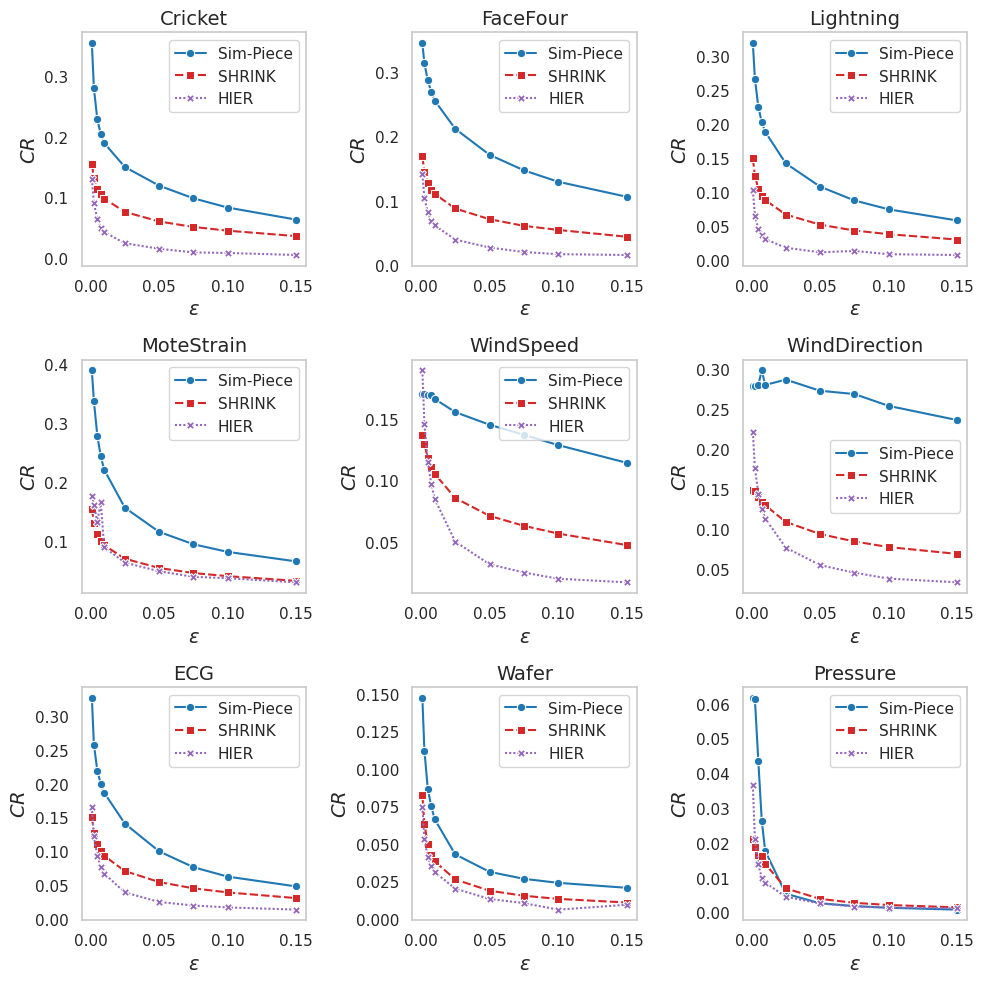

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Epsilon values and datasets
epsilon_values = [0.15, 0.1, 0.075, 0.05, 0.025, 0.01, 0.0075, 0.005, 0.0025, 0.001]
datasets = ['Cricket', 'FaceFour', 'Lightning', 'MoteStrain',  'WindSpeed', 'WindDirection', 'ECG', 'Wafer','Pressure']

# # Compression ratio values for 'Sim-Piece' for each dataset
sim_piece_values = {
    'Cricket': [0.06296,0.08290,0.09816,0.11904,0.14985,0.18924,0.20393,0.22827,0.27958,0.35429],
    'FaceFour':[0.10608,0.12937,0.14710,0.17117,0.21139,0.25538,0.26849,0.28651,0.31298,0.34472],
    'Lightning': [0.05774,0.07420,0.08734,0.10774,0.14209,0.18868,0.20313,0.22536,0.26716,0.31992],
    'MoteStrain': [0.06602,0.08209,0.09502,0.11593,0.15685,0.22087,0.24334,0.27835,0.33642,0.38880],
    'WindSpeed': [0.11406 ,0.12849 ,0.13680 ,0.14502 ,0.15527 ,0.16599 ,0.16887 ,0.16906 ,0.17034 ,0.17036 ],
    'WindDirection': [0.23584,0.25360,0.26843,0.27254,0.28646,0.27983,0.29816,0.27960,0.27893,0.27885],
    'ECG': [0.04776,0.06230,0.07626,0.09971,0.14082,0.18638,0.19957,0.21891,0.25760,0.32712],
    'Wafer': [0.02068,0.02399,0.02666,0.03131,0.04292,0.06630,0.07492,0.08631,0.11209,0.14731],
    'Pressure': [0.00080,0.00134,0.00183,0.00263,0.00538,0.01767,0.02638,0.04337,0.06125,0.06173]
                #0.00080,0.00134,0.00183,0.00263,0.00538,0.01767,0.02638,0.04337,0.06125,0.06173
}

SHRINK_values = {
    'Cricket': [0.03580 ,0.04477,0.05093, 0.05995,0.07579,0.09768,0.10450,0.11415,0.13131,0.15414 ],
    'FaceFour':[0.04408,0.05466,0.06098,0.07125,0.08790,0.11051,0.11716,0.12716,0.14491,0.16902],
    'Lightning':[0.02957,0.03751,0.04294,0.05156,0.06652,0.08783,0.09461,0.10478,0.12329,0.14950],
    'MoteStrain':[0.03311,0.04112,0.04636,0.05490,0.07064,0.09341,0.10071,0.11168,0.13076,0.15533],
    'WindSpeed':[0.04721,0.05656,0.06287,0.07095,0.08544,0.10515,0.11055,0.11793,0.12925,0.13697],
    'WindDirection':[0.06852,0.07708,0.08411,0.09337,0.10850,0.12950,0.13364,0.13960,0.14668,0.14802],
    'ECG': [0.03050 ,0.03893 ,0.04498 ,0.05429 ,0.07057 ,0.09309 ,0.10012 ,0.10990 ,0.12741 ,0.15092 ],
    'Wafer':[0.01089 ,0.01330 ,0.01539 ,0.01873 ,0.02626 ,0.03828 ,0.04278 ,0.04969 ,0.06325 ,0.08229],
    'Pressure':[0.00146 ,0.00213 ,0.00276 ,0.00389 ,0.00691 ,0.01399 ,0.01635 ,0.01640 ,0.01869 ,0.02110 ]
}

LFZip_values = {
    'Cricket': [ 0.0332,0.0395	,0.0479, 0.0839,0.1211, 0.121,0.134,0.1366,0.153,0.1733],
    'FaceFour':[ 0.0359	,0.0416	,0.0477	, 0.0574	,0.0766	, 0.0918	,0.1282	,0.1105	,0.1482	,0.1766	],
    'Lightning':[ 0.0236,0.0326	,0.0347, 0.0444,0.0589, 0.0818,0.157,0.1237,0.141,0.1553],
    'MoteStrain':[ 0.0307	,0.0376	,0.04	, 0.0494	,0.064	, 0.0901	,0.1664	,0.1325	,0.1621	,0.177	],
    'WindSpeed':[ 0.0595,0.0973	, 0.0789, 0.1014, 0.1118, 0.1274, 0.135, 0.1426, 0.157, 0.1782],
    'WindDirection':[0.1991,0.2345,0.2351,0.2945,0.3017,0.3233,0.3338,0.3429,0.3649,0.3901],
    'ECG': [ 0.0269,0.032,0.0403, 0.0751,0.1128, 0.1147,0.128,0.131,0.147,0.1688],
    'Wafer':[0.0128, 0.0181, 0.0187, 0.0759, 0.0639, 0.0585, 0.066, 0.0664, 0.0758, 0.0906],
    'Pressure':[0.0289, 0.039, 0.033, 0.0403, 0.0479, 0.0635, 0.07, 0.0784, 0.0937, 0.1114]
}

HIER_values = {
    'Cricket': [ 0.0047,0.00802,  0.009, 0.0150,  0.024, 0.0426,  0.05,  0.064,  0.09,  0.130],
    'FaceFour':[  0.01579,0.017028,  0.0204, 0.02729,  0.0397, 0.06154,  0.069,  0.0818,  0.104,  0.1408],
    'Lightning':[  0.00681,0.007938,  0.0128, 0.01075,  0.0175, 0.03033,  0.036,  0.0449,  0.065,  0.1023],
    'MoteStrain':[ 0.0307	,0.0376	,0.04	, 0.0494	,0.064	, 0.0901	,0.1664	,0.1325	,0.1621	,0.177	],####删除
    'WindSpeed':[  0.01694,0.019849,  0.0249, 0.03160,  0.0500, 0.08469,  0.097,  0.1147,  0.146,  0.1893],
    'WindDirection':[ 0.03301,0.037662,  0.0450, 0.05453,  0.0764, 0.11279,  0.125,  0.1439,  0.176,  0.2212],
    'ECG': [ 0.01342,0.016727,  0.0195, 0.02480,  0.0390, 0.06687,0.077,  0.0926,0.122,  0.1657],
    'Wafer':[ 0.00938,0.006145,  0.0105, 0.01325,  0.0201, 0.03117,  0.035,  0.0412,  0.053,  0.0746],
    'Pressure':[ 0.00120,0.001369,  0.0017, 0.00257,  0.0045, 0.00857,0.010,  0.0138,0.021,  0.0365]
}

# Construct the DataFrame
rows = []
for dataset in datasets:
    for epsilon in epsilon_values:
        # Append 'Sim-Piece' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Sim-Piece',
            'Epsilon': epsilon,
            'Compression Ratio': sim_piece_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'LFZip' method results
        # rows.append({
        #     'Dataset': dataset,
        #     'Method': 'LFZip',
        #     'Epsilon': epsilon,
        #     'Compression Ratio': LFZip_values[dataset][epsilon_values.index(epsilon)]
        # })
        # Append 'Our' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'SHRINK',
            'Epsilon': epsilon,
            'Compression Ratio': SHRINK_values[dataset][epsilon_values.index(epsilon)]
        })
        # Append 'HIER' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'HIER',
            'Epsilon': epsilon,
            'Compression Ratio': HIER_values[dataset][epsilon_values.index(epsilon)]
        })

df = pd.DataFrame(rows)

# Define the plotting style
sns.set(style="whitegrid")
markers = {'Sim-Piece': 'o', 'LFZip': '*', 'SHRINK': 's', "HIER":'X'}

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=False, sharey=False)
axes = axes.flatten()

color_palette = sns.color_palette('tab10')
palette = [color_palette[0], color_palette[4], color_palette[3], color_palette[5]]
palette = [color_palette[0], color_palette[3], color_palette[4]]


# Plot each dataset
for i, dataset in enumerate(datasets):
    ax = axes[i]
    sns.lineplot(data=df[df['Dataset'] == dataset], x='Epsilon', y='Compression Ratio',
                 hue='Method',style='Method',  markers=markers, ax=ax, palette=palette) 
    ax.set_title(dataset, fontsize=14)
    ax.set_xlabel(r'$\epsilon$', fontsize=14)  # Set the name of the X-axis here
    ax.set_ylabel(r'$CR$', fontsize=14)  # Set the name of the X-axis here
    axes[i].grid(False)  # Turn off the grid
    

# Remove extra subplots if datasets are less than 9
for j in range(i + 1, 9):
    fig.delaxes(axes[j])

# Iterate through the axes to remove the legend title
for ax in fig.axes:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels)

plt.tight_layout()

# Save the plot as a PDF file
# pdf_filename = '/home/guoyou/ExtractSemantic/figure/crlossy.pdf'
# plt.savefig(pdf_filename, format='pdf')


plt.show()

/tmp/ipykernel_3791995/3447713639.py:112: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(data=df[df['Dataset'] == dataset], x='Epsilon', y='Compression Ratio',
/tmp/ipykernel_3791995/3447713639.py:112: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(data=df[df['Dataset'] == dataset], x='Epsilon', y='Compression Ratio',
/tmp/ipykernel_3791995/3447713639.py:112: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(data=df[df['Dataset'] == dataset], x='Epsilon', y='Compression Ratio',
/tmp/ipykernel_3791995/3447713639.py:112: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(data=df[df['Dataset'] == dataset], x='Epsilon', y='Compression Ratio',
/tmp/ipykernel_3791995/3447713639.py:112: UserWarning: The palette list has more values (3) than needed (2), whi

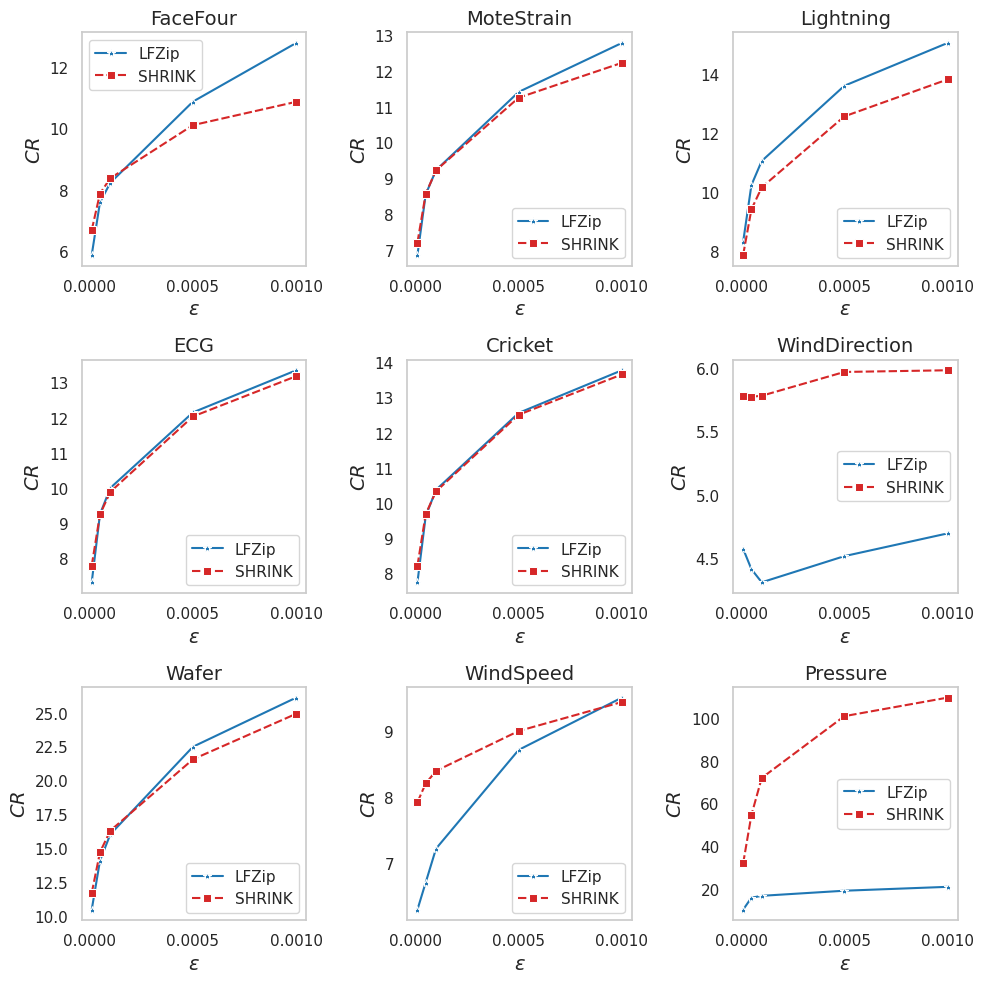

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Epsilon values and datasets
epsilon_values = [0.00001, 0.00005, 0.0001, 0.0005, 0.001]
datasets = ["FaceFour", "MoteStrain", "Lightning", "ECG", "Cricket",  
           "WindDirection", "Wafer", "WindSpeed",  "Pressure"]

# # Compression ratio values for 'Sim-Piece' for each dataset
# sim_piece_values = {
#     'Cricket': [0.06296,0.08290,0.09816,0.11904,0.14985,0.18924,0.20393,0.22827,0.27958,0.35429],
#     'FaceFour':[0.10608,0.12937,0.14710,0.17117,0.21139,0.25538,0.26849,0.28651,0.31298,0.34472],
#     'Lightning': [0.05774,0.07420,0.08734,0.10774,0.14209,0.18868,0.20313,0.22536,0.26716,0.31992],
#     'MoteStrain': [0.06602,0.08209,0.09502,0.11593,0.15685,0.22087,0.24334,0.27835,0.33642,0.38880],
#     'WindSpeed': [0.11406 ,0.12849 ,0.13680 ,0.14502 ,0.15527 ,0.16599 ,0.16887 ,0.16906 ,0.17034 ,0.17036 ],
#     'WindDirection': [0.23584,0.25360,0.26843,0.27254,0.28646,0.27983,0.29816,0.27960,0.27893,0.27885],
#     'ECG': [0.04776,0.06230,0.07626,0.09971,0.14082,0.18638,0.19957,0.21891,0.25760,0.32712],
#     'Wafer': [0.02068,0.02399,0.02666,0.03131,0.04292,0.06630,0.07492,0.08631,0.11209,0.14731],
#     'Pressure': [0.00080,0.00134,0.00183,0.00263,0.00538,0.01767,0.02638,0.04337,0.06125,0.06173]
#                 #0.00080,0.00134,0.00183,0.00263,0.00538,0.01767,0.02638,0.04337,0.06125,0.06173
# }

SHRINK_values = {
    'FaceFour':[6.68902 , 7.87675 , 8.37560 , 10.09996, 10.85857],
    'MoteStrain':[7.20055 ,8.56348 ,9.22102 ,11.25231,12.22795],
    'Lightning':[7.84857 , 9.39565 , 10.14221, 12.55298, 13.80716],
	'ECG': [7.79387  ,9.24753  ,9.88837  ,12.03117 ,13.17676 ],
    'Cricket': [8.19653 ,9.67117 ,10.31989,12.50689,13.65813],
    'WindDirection':[5.77812,5.77081,5.77840,5.96555,5.97877],
    'Wafer':[11.68262,14.69240,16.28282,21.55022,24.91258],
    'WindSpeed':[7.92305,8.20734,8.39761,9.00132,9.44047],
    'Pressure':[31.86467 ,54.54111 ,71.96987 ,100.94116,109.64426]
}

LFZip_values  = {
    'FaceFour':[5.8788,7.593,8.2255,10.8652,12.7726	],
    'MoteStrain':[6.8521,8.5465,9.2258,11.4135,12.7845	],
    'Lightning':[8.2923,10.2196	,11.0393,13.5915,15.0457	],
	'ECG': [7.3165,9.252, 9.999, 12.1469, 13.3451],
    'Cricket': [7.7236, 9.6132,10.3642,12.5591, 13.7774	],
    'WindDirection':[4.5752, 4.4154	,4.3119	,4.5176	,4.6965	],
    'Wafer':[10.4514, 14.0662	,16.0127, 22.4775, 26.1062],
    'WindSpeed':[6.2972	,6.7078	,7.2207	,8.7152	,9.5071	],
    'Pressure':[10.1932, 15.787, 16.6788, 19.0688, 20.8928	]
}

# HIER_values = {
#     'Cricket': [ 0.0047,0.00802,  0.009, 0.0150,  0.024, 0.0426,  0.05,  0.064,  0.09,  0.130],
#     'FaceFour':[  0.01579,0.017028,  0.0204, 0.02729,  0.0397, 0.06154,  0.069,  0.0818,  0.104,  0.1408],
#     'Lightning':[  0.00681,0.007938,  0.0128, 0.01075,  0.0175, 0.03033,  0.036,  0.0449,  0.065,  0.1023],
#     'MoteStrain':[ 0.0307	,0.0376	,0.04	, 0.0494	,0.064	, 0.0901	,0.1664	,0.1325	,0.1621	,0.177	],####删除
#     'WindSpeed':[  0.01694,0.019849,  0.0249, 0.03160,  0.0500, 0.08469,  0.097,  0.1147,  0.146,  0.1893],
#     'WindDirection':[ 0.03301,0.037662,  0.0450, 0.05453,  0.0764, 0.11279,  0.125,  0.1439,  0.176,  0.2212],
#     'ECG': [ 0.01342,0.016727,  0.0195, 0.02480,  0.0390, 0.06687,0.077,  0.0926,0.122,  0.1657],
#     'Wafer':[ 0.00938,0.006145,  0.0105, 0.01325,  0.0201, 0.03117,  0.035,  0.0412,  0.053,  0.0746],
#     'Pressure':[ 0.00120,0.001369,  0.0017, 0.00257,  0.0045, 0.00857,0.010,  0.0138,0.021,  0.0365]
# }

# Construct the DataFrame
rows = []
for dataset in datasets:
    for epsilon in epsilon_values:
        # Append 'Sim-Piece' method results
        # rows.append({
        #     'Dataset': dataset,
        #     'Method': 'Sim-Piece',
        #     'Epsilon': epsilon,
        #     'Compression Ratio': sim_piece_values[dataset][epsilon_values.index(epsilon)]
        # })

        #Append 'LFZip' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'LFZip',
            'Epsilon': epsilon,
            'Compression Ratio': LFZip_values[dataset][epsilon_values.index(epsilon)]
        })
        # Append 'Our' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'SHRINK',
            'Epsilon': epsilon,
            'Compression Ratio': SHRINK_values[dataset][epsilon_values.index(epsilon)]
        })
        # # Append 'HIER' method results
        # rows.append({
        #     'Dataset': dataset,
        #     'Method': 'HIER',
        #     'Epsilon': epsilon,
        #     'Compression Ratio': HIER_values[dataset][epsilon_values.index(epsilon)]
        # })

df = pd.DataFrame(rows)

# Define the plotting style
sns.set(style="whitegrid")
markers = {'Sim-Piece': 'o', 'LFZip': '*', 'SHRINK': 's', "HIER":'X'}

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=False, sharey=False)
axes = axes.flatten()

color_palette = sns.color_palette('tab10')
palette = [color_palette[0], color_palette[4], color_palette[3], color_palette[5]]
palette = [color_palette[0], color_palette[3], color_palette[4]]


# Plot each dataset
for i, dataset in enumerate(datasets):
    ax = axes[i]
    sns.lineplot(data=df[df['Dataset'] == dataset], x='Epsilon', y='Compression Ratio',
                 hue='Method',style='Method',  markers=markers, ax=ax, palette=palette) 
    ax.set_title(dataset, fontsize=14)
    ax.set_xlabel(r'$\epsilon$', fontsize=14)  # Set the name of the X-axis here
    ax.set_ylabel(r'$CR$', fontsize=14)  # Set the name of the X-axis here
    axes[i].grid(False)  # Turn off the grid
    

# Remove extra subplots if datasets are less than 9
for j in range(i + 1, 9):
    fig.delaxes(axes[j])

# Iterate through the axes to remove the legend title
for ax in fig.axes:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels)

plt.tight_layout()

# Save the plot as a PDF file
# pdf_filename = '/home/guoyou/ExtractSemantic/figure/crlossy.pdf'
# plt.savefig(pdf_filename, format='pdf')


plt.show()

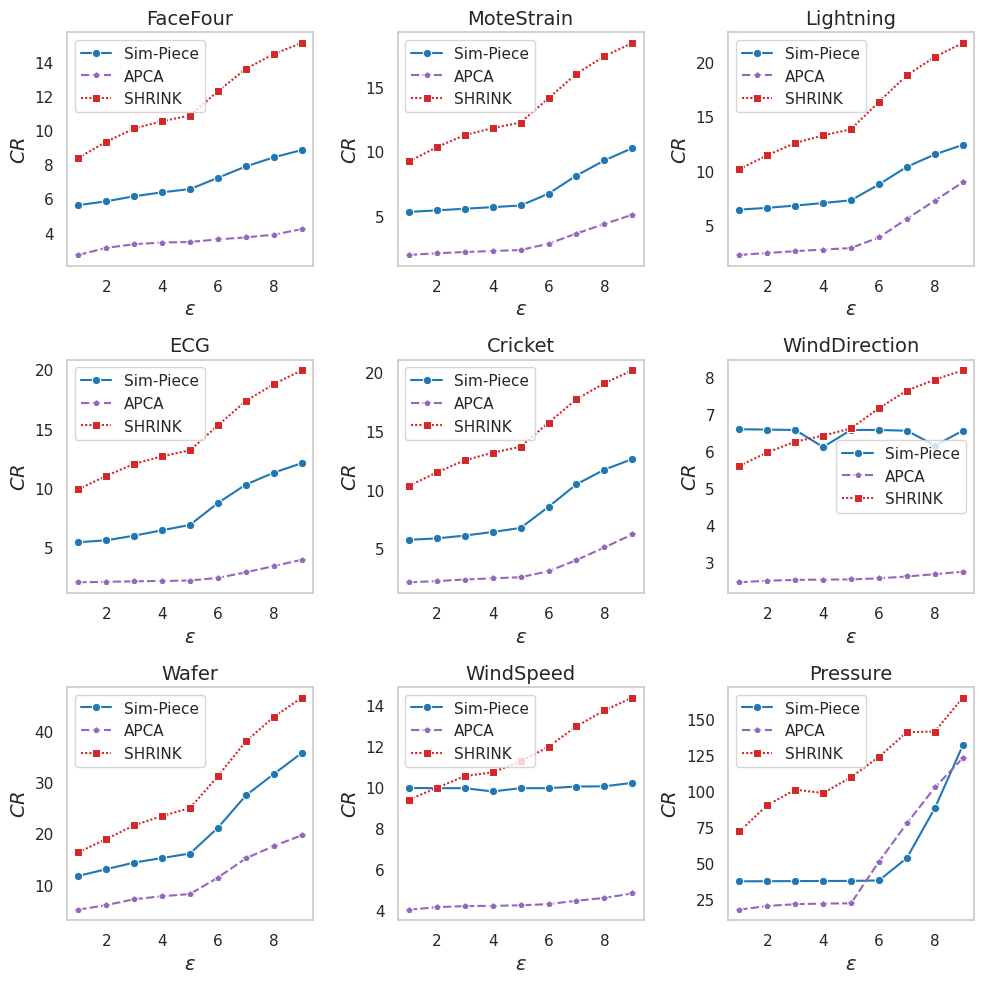

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Epsilon values and datasets
epsilon_values =  [ 0.01, 0.0075, 0.005, 0.0025, 0.001, 0.00075, 0.0005, 0.00025, 0.0001]
epsilon_values =  [9, 8, 7, 6, 5, 4, 3, 2, 1]
datasets = ["FaceFour", "MoteStrain", "Lightning", "ECG", "Cricket",  
           "WindDirection", "Wafer", "WindSpeed",  "Pressure"]

# # Compression ratio values for 'Sim-Piece' for each dataset
sim_piece_values = {
    'FaceFour':     [8.84,8.41,7.88,7.21,6.55,6.36,6.13,5.83,5.61],
    'MoteStrain':   [10.25,9.30	,8.13	,6.73	,5.82	,5.69	,5.57	,5.44	,5.32	],
    'Lightning':    [12.38,11.50,10.37,8.75	,7.30	,7.04	,6.81	,6.60	,6.44	],
	'ECG':          [12.09,11.29,10.29,8.74	,6.89	,6.44	,5.98	,5.59	,5.43	],
    'Cricket':      [12.61,11.71,10.46,8.54	,6.74	,6.40	,6.09	,5.85	,5.73	],
    'WindDirection':[6.55	,6.15	,6.55	,6.57	,6.57	,6.11	,6.57	,6.58	,6.59	],
    'Wafer':        [35.66,31.56,27.39,21.09,16.05,15.17,14.29,12.99,11.68],
    'WindSpeed':    [10.20,10.03,10.02,9.94	,9.94	,9.78	,9.94	,9.94	,9.95	],
    'Pressure':     [131.7,88.21,53.65,37.99,37.69,37.62,37.55,37.46,37.41]
}

SHRINK_values = {
    'FaceFour':     [15.11241,14.46862,13.59699,12.28316,10.85857,10.52717,10.09996,9.32058 ,8.37560 ],
    'MoteStrain':   [18.37514,17.34716,16.00098,14.09950,12.22795,11.79617,11.25231,10.32212,9.22102 ],
    'Lightning':    [21.72184,20.43443,18.76517,16.33672,13.80716,13.24363,12.55298,11.41625,10.14221],
	'ECG':          [19.91399,18.74836,17.33793,15.27834,13.17676,12.66862,12.03117,11.01981,9.88837 ],
    'Cricket':      [20.17704,19.07645,17.71097,15.71066,13.65813,13.15025,12.50689,11.46656,10.31989],
    # 'WindDirection':[6.36368 ,6.27292 ,6.14761 ,6.00478 ,5.97877 ,5.94635 ,5.96555 ,5.90858 ,5.77840 ],
    'WindDirection':[8.18183,7.92946,7.63274,7.16081,6.61242,6.41749,6.25450,5.96314,5.60039],
    'Wafer':        [46.45685,42.68509,37.94681,31.16345,24.91258,23.37160,21.55022,18.86220,16.28282],
    # 'WindSpeed':    [11.47445,11.06950,10.56146,9.86393 ,9.44047 ,9.06592 ,9.00132 ,8.62394 ,8.39761 ],
    'WindSpeed':    [14.33963,13.71377,12.94973,11.94731,11.23700,10.71291,10.52327,9.95514 ,9.38075 ],
    'Pressure':     [164.80463,141.26348,140.82573,123.68910,109.64426,98.60341 ,100.94116,90.17869 ,71.96987 ]
}
apca_values = {
    'FaceFour':     [4.209735	,3.877301	,3.719562	,3.603769	,3.449945	,3.418244	,3.317606	,3.106181	,2.687877	],
    'MoteStrain':   [5.108159,4.390330,3.653704,2.869616,2.379370,2.302839,2.222926,2.132014,1.995914],
    'Lightning':    [8.942223,7.273719,5.602530,3.888490,2.919478,2.775710,2.628026,2.467091,2.279933],
	'ECG':          [3.953959,3.419751,2.897271,2.426630,2.202111,2.170051,2.137362,2.097318,2.052769],
    'Cricket':      [6.189576,5.080433,3.998360,3.055153,2.543782,2.449294,2.346472,2.216090,2.109009],
    'WindDirection':[2.744719,2.675587,2.614639,2.563179,2.535214,2.529459,2.521901,2.500056,2.456622],
    'Wafer':        [19.61862,17.51933,15.11678,11.36920,8.149882,7.717892,7.134529,5.980295,5.102398],
    'WindSpeed':    [4.828387	,4.608143	,4.474249	,4.306497	,4.251900	, 4.223497, 4.213712, 4.159390, 4.039969],
    'Pressure':     [122.87760,102.48006,77.646414,51.106421,22.155276,21.939261,21.557230,20.287232,17.746456]
}

# LFZip_values  = {
#     'FaceFour':[5.8788,7.593,8.2255,10.8652,12.7726	],
#     'MoteStrain':[6.8521,8.5465,9.2258,11.4135,12.7845	],
#     'Lightning':[8.2923,10.2196	,11.0393,13.5915,15.0457	],
# 	   'ECG': [7.3165,9.252, 9.999, 12.1469, 13.3451],
#     'Cricket': [7.7236, 9.6132,10.3642,12.5591, 13.7774	],
#     'WindDirection':[4.5752, 4.4154	,4.3119	,4.5176	,4.6965	],
#     'Wafer':[10.4514, 14.0662	,16.0127, 22.4775, 26.1062],
#     'WindSpeed':[6.2972	,6.7078	,7.2207	,8.7152	,9.5071	],
#     'Pressure':[10.1932, 15.787, 16.6788, 19.0688, 20.8928	]
# }

# HIER_values = {
#     'Cricket': [ 0.0047,0.00802,  0.009, 0.0150,  0.024, 0.0426,  0.05,  0.064,  0.09,  0.130],
#     'FaceFour':[  0.01579,0.017028,  0.0204, 0.02729,  0.0397, 0.06154,  0.069,  0.0818,  0.104,  0.1408],
#     'Lightning':[  0.00681,0.007938,  0.0128, 0.01075,  0.0175, 0.03033,  0.036,  0.0449,  0.065,  0.1023],
#     'MoteStrain':[ 0.0307	,0.0376	,0.04	, 0.0494	,0.064	, 0.0901	,0.1664	,0.1325	,0.1621	,0.177	],####删除
#     'WindSpeed':[  0.01694,0.019849,  0.0249, 0.03160,  0.0500, 0.08469,  0.097,  0.1147,  0.146,  0.1893],
#     'WindDirection':[ 0.03301,0.037662,  0.0450, 0.05453,  0.0764, 0.11279,  0.125,  0.1439,  0.176,  0.2212],
#     'ECG': [ 0.01342,0.016727,  0.0195, 0.02480,  0.0390, 0.06687,0.077,  0.0926,0.122,  0.1657],
#     'Wafer':[ 0.00938,0.006145,  0.0105, 0.01325,  0.0201, 0.03117,  0.035,  0.0412,  0.053,  0.0746],
#     'Pressure':[ 0.00120,0.001369,  0.0017, 0.00257,  0.0045, 0.00857,0.010,  0.0138,0.021,  0.0365]
# }

# Construct the DataFrame
rows = []
for dataset in datasets:
    for epsilon in epsilon_values:
        # Append 'Sim-Piece' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Sim-Piece',
            'Epsilon': epsilon,
            'Compression Ratio': sim_piece_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'APCA' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'APCA',
            'Epsilon': epsilon,
            'Compression Ratio': apca_values[dataset][epsilon_values.index(epsilon)]
        })

        #Append 'LFZip' method results
        # rows.append({
        #     'Dataset': dataset,
        #     'Method': 'LFZip',
        #     'Epsilon': epsilon,
        #     'Compression Ratio': LFZip_values[dataset][epsilon_values.index(epsilon)]
        # })
        # Append 'Our' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'SHRINK',
            'Epsilon': epsilon,
            'Compression Ratio': SHRINK_values[dataset][epsilon_values.index(epsilon)]
        })
        # # Append 'HIER' method results
        # rows.append({
        #     'Dataset': dataset,
        #     'Method': 'HIER',
        #     'Epsilon': epsilon,
        #     'Compression Ratio': HIER_values[dataset][epsilon_values.index(epsilon)]
        # })

df = pd.DataFrame(rows)

# Define the plotting style
sns.set(style="whitegrid")
markers = {'Sim-Piece': 'o', 'LFZip': '*', 'SHRINK': 's', "HIER":'X', 'APCA':'p'}

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=False, sharey=False)
axes = axes.flatten()

color_palette = sns.color_palette('tab10')
palette = [color_palette[0], color_palette[4], color_palette[3], color_palette[5]]
palette = [color_palette[0], color_palette[4], color_palette[3]]


# Plot each dataset
for i, dataset in enumerate(datasets):
    ax = axes[i]
    sns.lineplot(data=df[df['Dataset'] == dataset], x='Epsilon', y='Compression Ratio',
                 hue='Method',style='Method',  markers=markers, ax=ax, palette=palette) 
    ax.set_title(dataset, fontsize=14)
    ax.set_xlabel(r'$\epsilon$', fontsize=14)  # Set the name of the X-axis here
    ax.set_ylabel(r'$CR$', fontsize=14)  # Set the name of the X-axis here
    axes[i].grid(False)  # Turn off the grid
    

# Remove extra subplots if datasets are less than 9
for j in range(i + 1, 9):
    fig.delaxes(axes[j])

# Iterate through the axes to remove the legend title
for ax in fig.axes:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels)

plt.tight_layout()

# Save the plot as a PDF file
# pdf_filename = '/home/guoyou/ExtractSemantic/figure/crlossy.pdf'
# plt.savefig(pdf_filename, format='pdf')


plt.show()

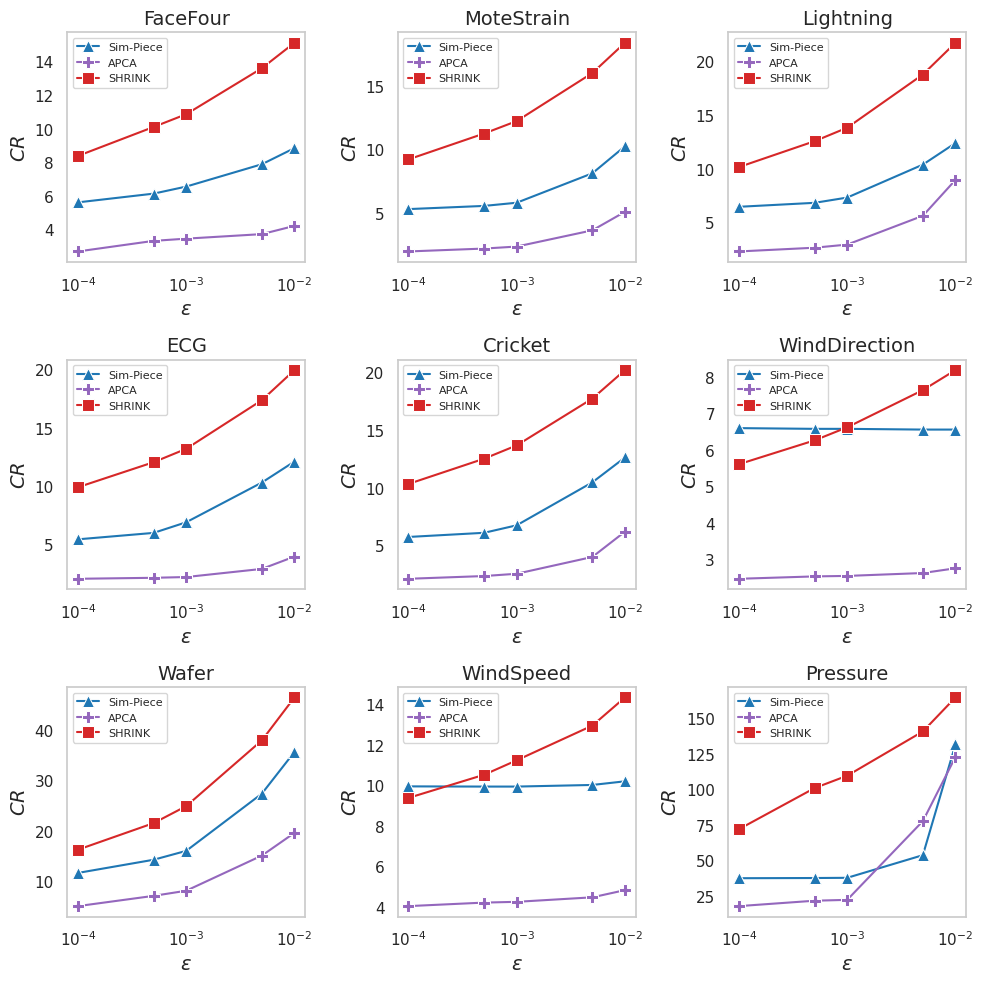

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import LogLocator


# Epsilon values and datasets
epsilon_values =  [ 0.01, 0.005, 0.001, 0.0005, 0.0001]
datasets = ["FaceFour", "MoteStrain", "Lightning", "ECG", "Cricket",  
           "WindDirection", "Wafer", "WindSpeed",  "Pressure"]

# # Compression ratio values for 'Sim-Piece' for each dataset
sim_piece_values = {
'FaceFour':     [8.84,		7.88,	6.55,	6.13,	5.61],
'MoteStrain':   [10.25,		8.13,	5.82,	5.57,	5.32	],
'Lightning':    [12.38,		10.37,	7.30,	6.81,	6.44	],
'ECG':          [12.09,		10.29,	6.89,	5.98,	5.43	],
'Cricket':      [12.61,		10.46,	6.74,	6.09,	5.73	],
'WindDirection':[6.55,		6.55,	6.57,	6.57,	6.59	],
'Wafer':        [35.66,		27.39,	16.05,	14.29,	11.68	],
'WindSpeed':    [10.20,		10.02,	9.94,	9.94,	9.95	],
'Pressure':     [131.7,		53.65,	37.69,	37.55,	37.41	]
}

SHRINK_values = {
'FaceFour':     [15.11241,		13.59699,		10.85857,	10.09996,		8.37560 ],
'MoteStrain':   [18.37514,		16.00098,		12.22795,	11.25231,		9.22102 ],
'Lightning':    [21.72184,		18.76517,		13.80716,	12.55298,		10.14221],
'ECG':          [19.91399,		17.33793,		13.17676,	12.03117,		9.88837 ],
'Cricket':      [20.17704,		17.71097,		13.65813,	12.50689,		10.31989],
'WindDirection':[8.18183, 		7.63274,		6.61242,	6.25450,		5.60039],
'Wafer':        [46.45685,		37.94681,		24.91258,	21.55022,		16.28282],
'WindSpeed':    [14.33963,		12.94973,		11.23700,	10.52327,		9.38075 ],
'Pressure':     [164.80463,		140.82573,		109.64426,	100.94116,		71.96987 ]
}
apca_values = {
'FaceFour':     [4.209735,	3.719562,		3.449945,	3.317606,	2.687877],
'MoteStrain':   [5.108159,	3.653704,		2.379370,	2.222926,	1.995914],
'Lightning':    [8.942223,	5.602530,		2.919478,	2.628026,	2.279933],
'ECG':          [3.953959,	2.897271,		2.202111,	2.137362,	2.052769],
'Cricket':      [6.189576,	3.998360,		2.543782,	2.346472,	2.109009],
'WindDirection':[2.744719,	2.614639,		2.535214,	2.521901,	2.456622],
'Wafer':        [19.61862,	15.11678,		8.149882,	7.134529,	5.102398],
'WindSpeed':    [4.828387,	4.474249,		4.251900, 	4.213712, 	4.039969],
'Pressure':     [122.87760,	77.646414,		22.155276,	21.557230,	17.746456]
}


# Construct the DataFrame
rows = []
for dataset in datasets:
    for epsilon in epsilon_values:
        # Append 'Sim-Piece' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'Sim-Piece',
            'Epsilon': epsilon,
            'Compression Ratio': sim_piece_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'APCA' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'APCA',
            'Epsilon': epsilon,
            'Compression Ratio': apca_values[dataset][epsilon_values.index(epsilon)]
        })

        # Append 'Our' method results
        rows.append({
            'Dataset': dataset,
            'Method': 'SHRINK',
            'Epsilon': epsilon,
            'Compression Ratio': SHRINK_values[dataset][epsilon_values.index(epsilon)]
        })

df = pd.DataFrame(rows)

# Define the plotting style
sns.set(style="whitegrid")
markers = {'Sim-Piece': '^',  'SHRINK': 's',  'APCA':'P'}

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10), sharex=False, sharey=False)
axes = axes.flatten()

color_palette = sns.color_palette('tab10')
palette = [color_palette[0], color_palette[4], color_palette[3], color_palette[5]]
palette = [color_palette[0], color_palette[4], color_palette[3]]


# Plot each dataset
for i, dataset in enumerate(datasets):
    ax = axes[i]
    sns.lineplot(data=df[df['Dataset'] == dataset], x='Epsilon', y='Compression Ratio',
                 hue='Method',style='Method',   dashes=False, markers=markers, markersize=8, ax=ax, palette=palette) 
    ax.set_title(dataset, fontsize=14)
    ax.set_xlabel(r'$\epsilon$', fontsize=14)  # Set the name of the X-axis here
    ax.set_ylabel(r'$CR$', fontsize=14)  # Set the name of the X-axis here
    ax.set_xscale('log')
    ax.xaxis.set_major_locator(LogLocator(base=10, numticks=5))
    axes[i].grid(False)  # Turn off the grid
    

# Remove extra subplots if datasets are less than 9
for j in range(i + 1, 9):
    fig.delaxes(axes[j])

# Iterate through the axes to remove the legend title
for ax in fig.axes:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels, fontsize=8)

plt.tight_layout()

# Save the plot as a PDF file
# pdf_filename = '/home/guoyou/ExtractSemantic/figure/crlossy.pdf'
# plt.savefig(pdf_filename, format='pdf')


plt.show()